In [1]:
!pip install imbalanced-learn
# Run this in a Kaggle notebook cell
!pip install --upgrade scikit-learn imbalanced-learn

!pip install shap



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
  Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 58.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sdn-dataset/sdn.csv


In [3]:
!pip install -U scikit-learn imbalanced-learn


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
from matplotlib.pyplot import figure
import seaborn as sns
import time
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE

from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import shap




In [5]:
traindf = pd.read_csv("/kaggle/input/sdn-dataset/sdn.csv")

In [6]:

print(f"Dataset loaded: {traindf.shape}")
print(traindf.head())
print("\nDataset Info:")
print(traindf.info())
print("\nClass Distribution:")
print(traindf['label'].value_counts())

Dataset loaded: (104345, 23)
      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbp

EXPLORATORY DATA ANALYSIS

1. Plotting class distribution...



2. Identifying column types...
Total Observations: 104345
Total Variables: 23
Categorical Columns: 3
Numerical Columns: 20

Categorical Columns: ['src', 'dst', 'Protocol']
Numerical Columns: ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']

3. Unique values in categorical columns...

src: ['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']

dst: ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']

Protocol: ['UDP' 'TCP' 'ICMP']

4. Plotting IP address analysis (all requests)...


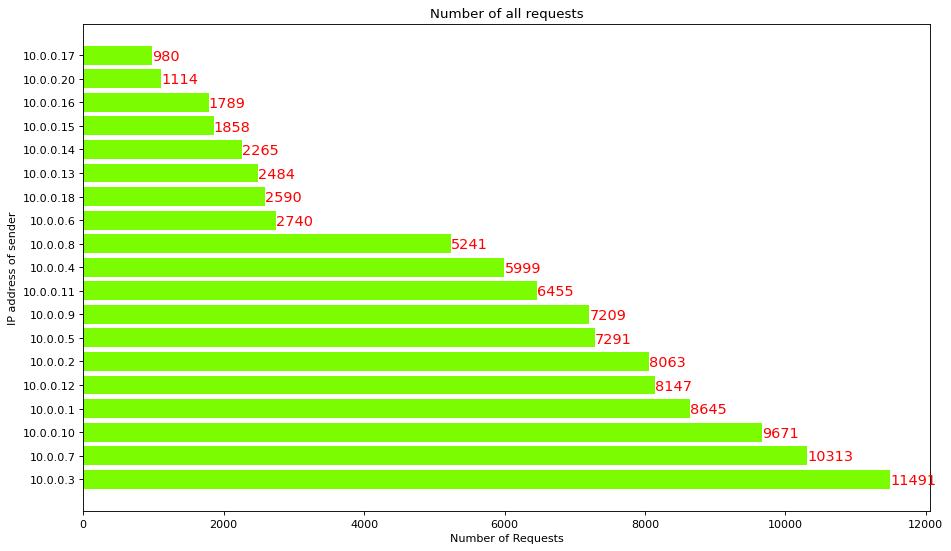


5. Plotting IP address analysis (attack requests only)...


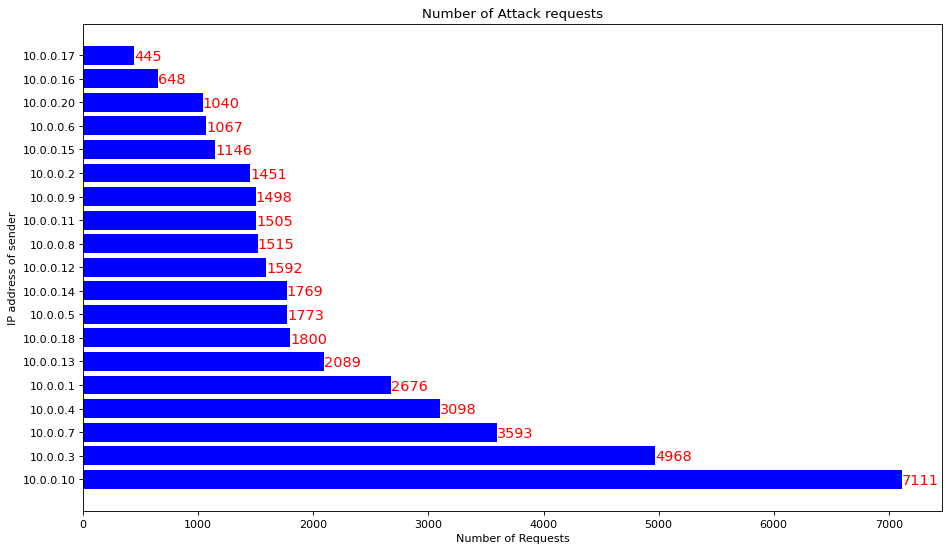


6. Comparing IP addresses (all vs malicious)...


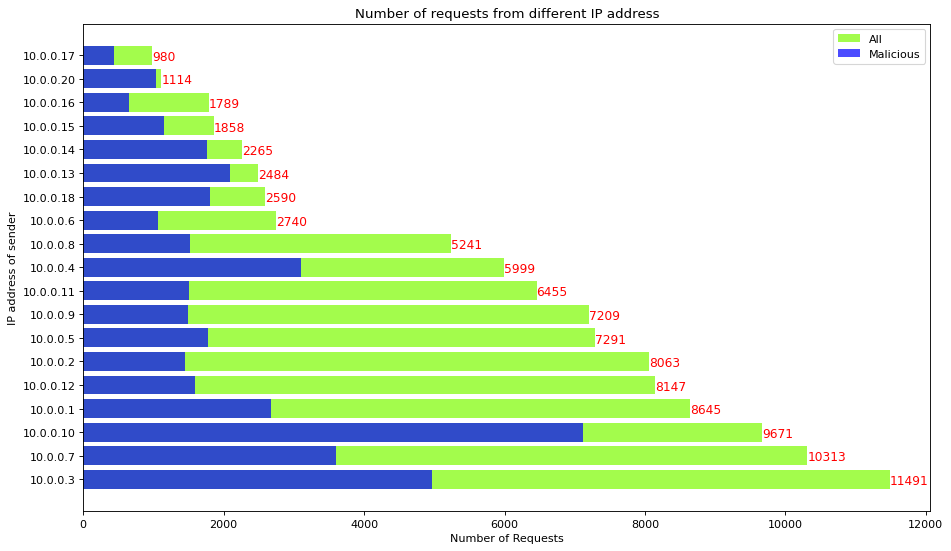


7. Plotting protocol analysis...


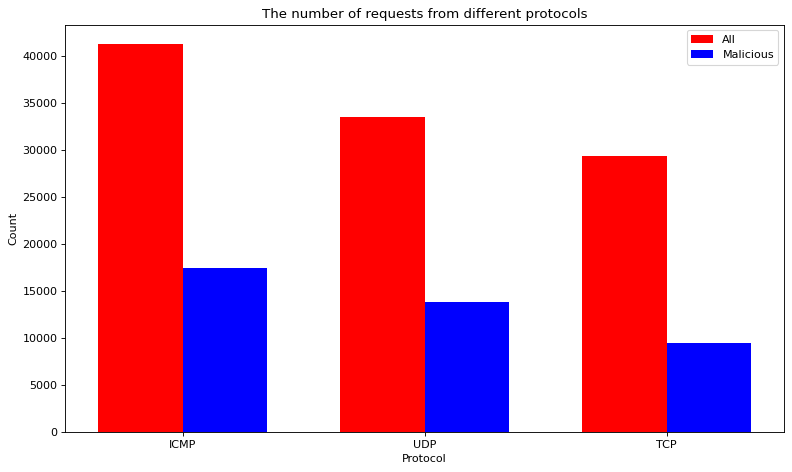


8. Plotting numerical feature distributions...


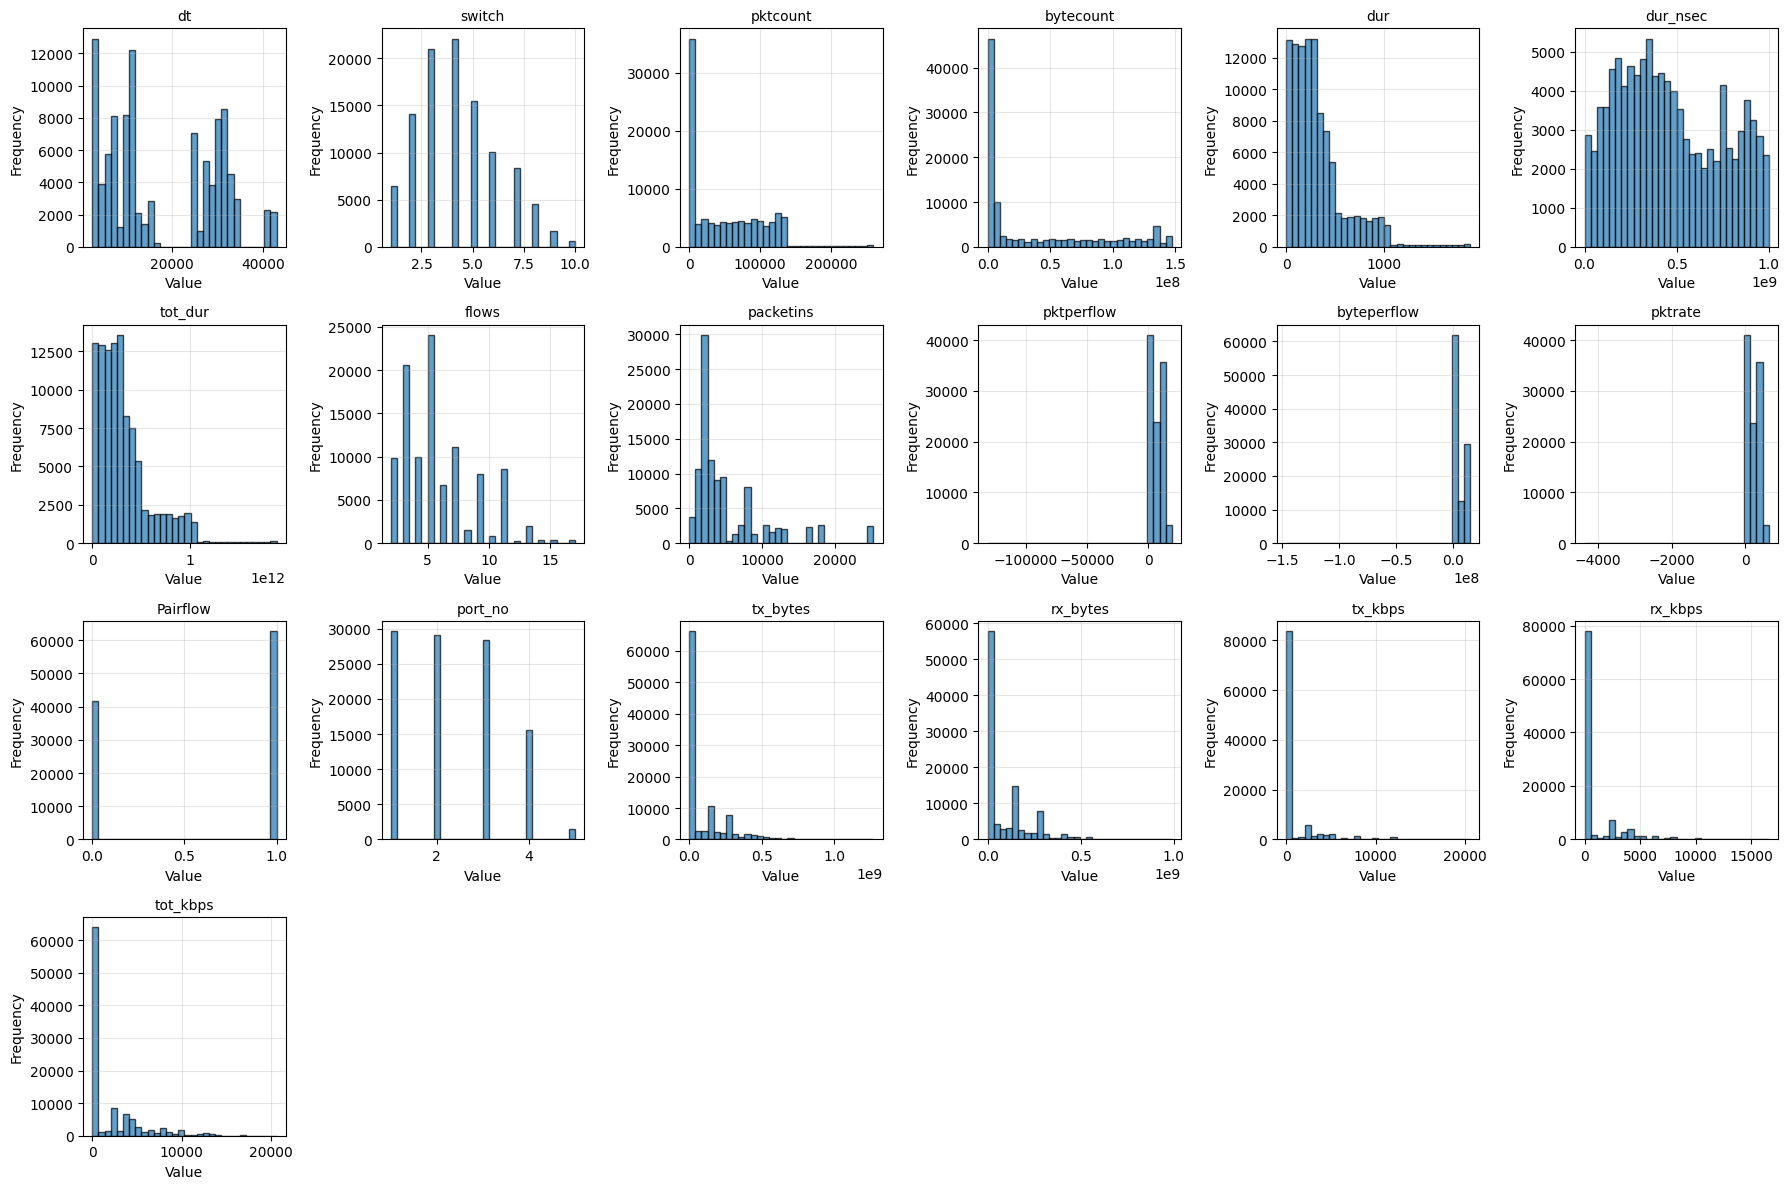


9. Plotting box plots for outlier detection...


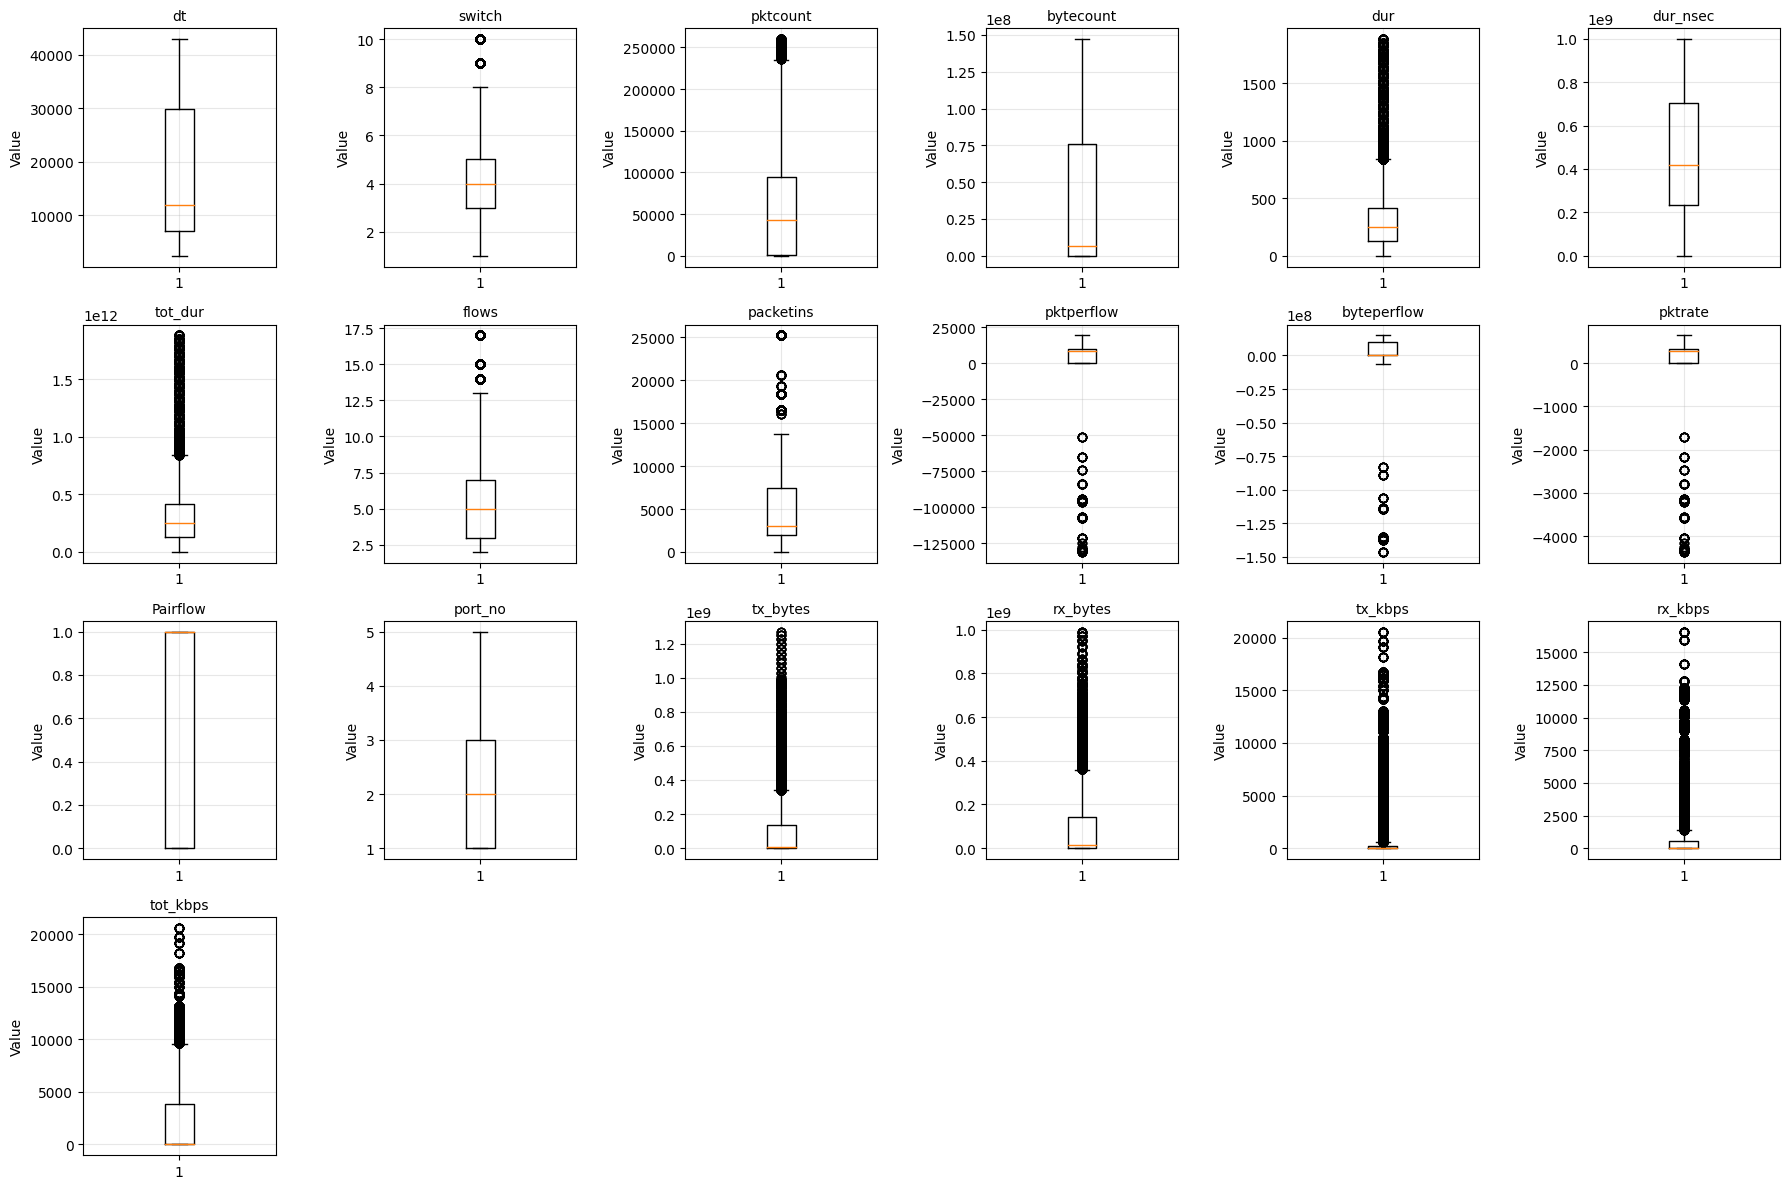


10. Plotting correlation heatmap...


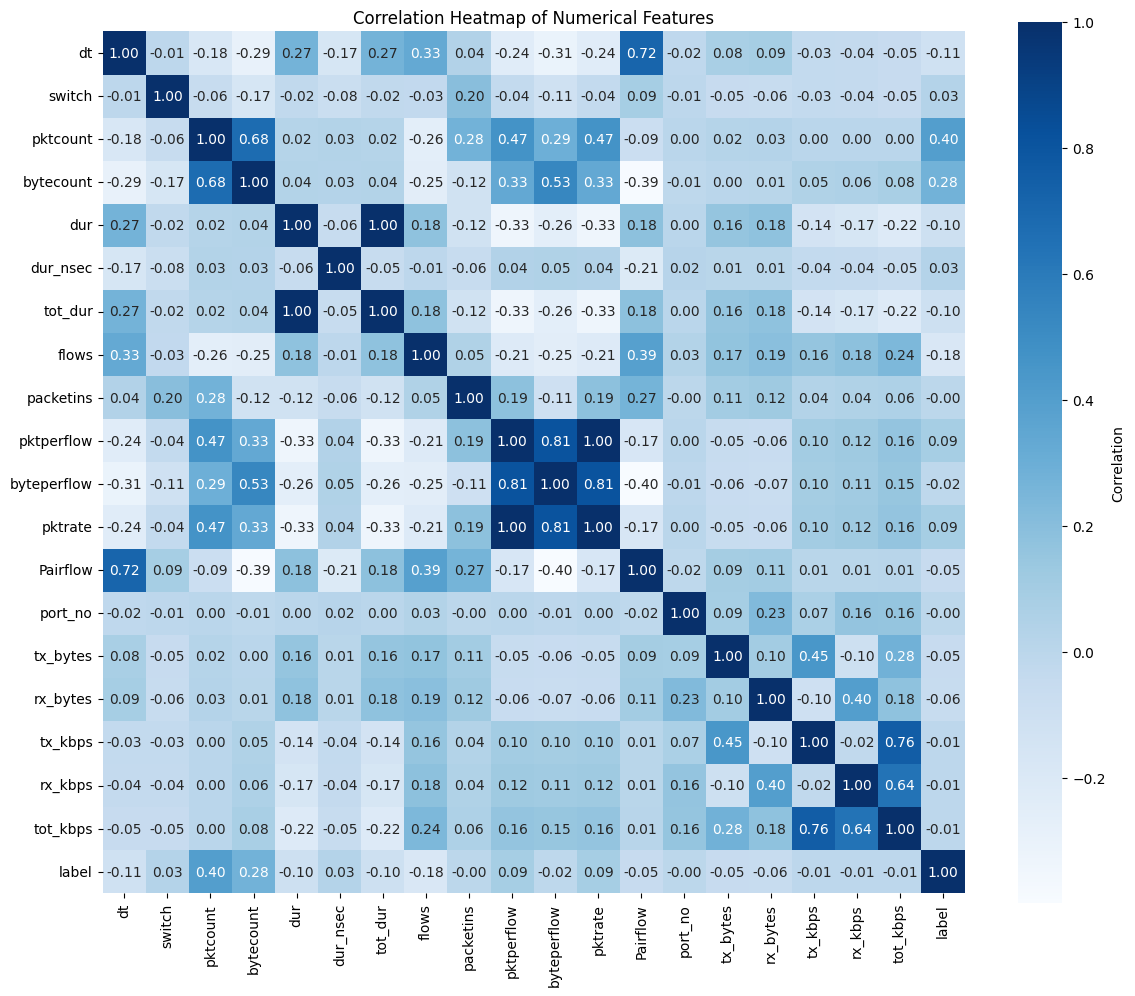


11. Checking missing values...


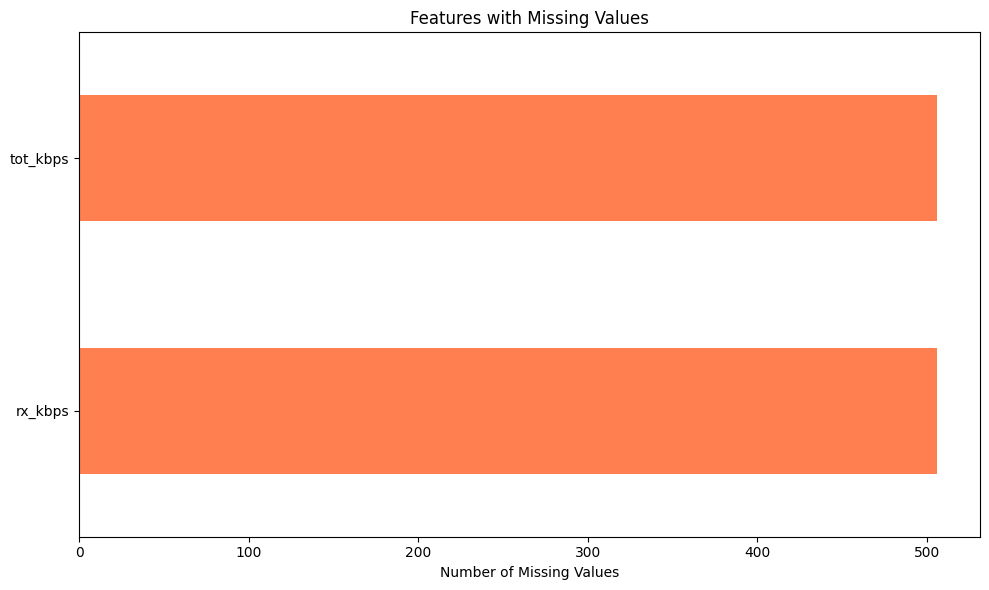


12. Summary statistics...

Numeric Features Summary:
                  dt         switch       pktcount     bytecount  \
count  104345.000000  104345.000000  104345.000000  1.043450e+05   
mean    17927.514169       4.214260   52860.954746  3.818660e+07   
std     11977.642655       1.956327   52023.241460  4.877748e+07   
min      2488.000000       1.000000       0.000000  0.000000e+00   
25%      7098.000000       3.000000     808.000000  7.957600e+04   
50%     11905.000000       4.000000   42828.000000  6.471930e+06   
75%     29952.000000       5.000000   94796.000000  7.620354e+07   
max     42935.000000      10.000000  260006.000000  1.471280e+08   

                 dur      dur_nsec       tot_dur          flows  \
count  104345.000000  1.043450e+05  1.043450e+05  104345.000000   
mean      321.497398  4.613880e+08  3.218865e+11       5.654234   
std       283.518232  2.770019e+08  2.834029e+11       2.950036   
min         0.000000  0.000000e+00  0.000000e+00       2.000000  

In [7]:
# ================================================================
# CELL 3: EXPLORATORY DATA ANALYSIS - SIMPLIFIED & FIXED
# ================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# ================================================================
# 1. CLASS DISTRIBUTION - PIE CHART
# ================================================================
print("\n1. Plotting class distribution...")
labels = ['Malicious', 'Benign']
sizes = [dict(traindf['label'].value_counts())[1], dict(traindf['label'].value_counts())[0]]

plt.figure(figsize=(13, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(['Malicious', 'Benign'])
plt.title('The percentage of Benign and Malicious Requests in dataset')
plt.show()

# ================================================================
# 2. IDENTIFY CATEGORICAL AND NUMERICAL COLUMNS
# ================================================================
print("\n2. Identifying column types...")

cat_cols = [col for col in traindf.columns if traindf[col].dtypes == "O"]
num_cols = [col for col in traindf.columns if traindf[col].dtypes != "O"]

print(f"Total Observations: {traindf.shape[0]}")
print(f"Total Variables: {traindf.shape[1]}")
print(f"Categorical Columns: {len(cat_cols)}")
print(f"Numerical Columns: {len(num_cols)}")

print(f"\nCategorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")

# ================================================================
# 3. DISPLAY UNIQUE VALUES IN CATEGORICAL COLUMNS
# ================================================================
print("\n3. Unique values in categorical columns...")
for col in cat_cols:
    print(f"\n{col}: {traindf[col].unique()}")

# ================================================================
# 4. IP ADDRESS ANALYSIS - ALL REQUESTS
# ================================================================
print("\n4. Plotting IP address analysis (all requests)...")
plt.figure(figsize=(12, 7), dpi=80)
src_counts = traindf['src'].value_counts()
plt.barh(src_counts.index, src_counts.values, color='lawngreen')

for idx, val in enumerate(src_counts.values):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)

plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.title('Number of all requests')
plt.tight_layout()
plt.show()

# ================================================================
# 5. IP ADDRESS ANALYSIS - ATTACK REQUESTS ONLY
# ================================================================
print("\n5. Plotting IP address analysis (attack requests only)...")
plt.figure(figsize=(12, 7), dpi=80)
attack_src = traindf[traindf['label'] == 1]['src'].value_counts()
plt.barh(attack_src.index, attack_src.values, color='blue')

for idx, val in enumerate(attack_src.values):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)

plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.title('Number of Attack requests')
plt.tight_layout()
plt.show()

# ================================================================
# 6. IP ADDRESS COMPARISON - ALL vs MALICIOUS
# ================================================================
print("\n6. Comparing IP addresses (all vs malicious)...")
plt.figure(figsize=(12, 7), dpi=80)
src_all = traindf['src'].value_counts()
src_attack = traindf[traindf['label'] == 1]['src'].value_counts()

plt.barh(src_all.index, src_all.values, color='lawngreen', label='All', alpha=0.7)
plt.barh(src_attack.index, src_attack.values, color='blue', label='Malicious', alpha=0.7)

for idx, val in enumerate(src_all.values):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=11)

plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.legend(['All', 'Malicious'])
plt.title('Number of requests from different IP address')
plt.tight_layout()
plt.show()

# ================================================================
# 7. PROTOCOL ANALYSIS - ALL vs MALICIOUS
# ================================================================
print("\n7. Plotting protocol analysis...")
plt.figure(figsize=(10, 6), dpi=80)

protocol_all = traindf['Protocol'].value_counts()
protocol_attack = traindf[traindf['label'] == 1]['Protocol'].value_counts()

x = np.arange(len(protocol_all))
width = 0.35

plt.bar(x - width/2, protocol_all.values, width, label='All', color='r')
plt.bar(x + width/2, protocol_attack.values, width, label='Malicious', color='b')

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('The number of requests from different protocols')
plt.xticks(x, protocol_all.index)
plt.legend(['All', 'Malicious'])
plt.tight_layout()
plt.show()

# ================================================================
# 8. DISTRIBUTION PLOTS FOR NUMERICAL FEATURES (SIMPLE)
# ================================================================
print("\n8. Plotting numerical feature distributions...")

# Select numeric columns (excluding label if present)
numeric_features = traindf.select_dtypes(include=[np.number]).columns.tolist()
if 'label' in numeric_features:
    numeric_features.remove('label')

# Plot distributions - 6 features per row
n_features = len(numeric_features)
n_cols = 6
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3*n_rows))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    try:
        axes[idx].hist(traindf[feature], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{feature}', fontsize=10)
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)
    except Exception as e:
        print(f"Error plotting {feature}: {e}")

# Hide empty subplots
for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ================================================================
# 9. BOX PLOTS FOR OUTLIER DETECTION
# ================================================================
print("\n9. Plotting box plots for outlier detection...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3*n_rows))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    try:
        axes[idx].boxplot(traindf[feature].dropna())
        axes[idx].set_title(f'{feature}', fontsize=10)
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)
    except Exception as e:
        print(f"Error plotting {feature}: {e}")

# Hide empty subplots
for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ================================================================
# 10. CORRELATION HEATMAP
# ================================================================
print("\n10. Plotting correlation heatmap...")

numeric_df = traindf.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Blues', 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# ================================================================
# 11. MISSING VALUES VISUALIZATION
# ================================================================
print("\n11. Checking missing values...")

missing_values = traindf.isna().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    plt.figure(figsize=(10, 6))
    missing_values.sort_values().plot(kind='barh', color='coral')
    plt.title('Features with Missing Values')
    plt.xlabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values in the dataset!")

# ================================================================
# 12. SUMMARY STATISTICS
# ================================================================
print("\n12. Summary statistics...")
print("\nNumeric Features Summary:")
print(traindf[numeric_features].describe())

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS COMPLETE")
print("="*60)


In [8]:
# ================================================================
# CELL 4: INITIAL DATA CLEANING (CORRECTED)
# ================================================================
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("="*60)
print("STEP 1: INITIAL DATA CLEANING")
print("="*60)

# First, check what columns exist
print("\nAvailable columns:")
print(traindf.columns.tolist())
print(f"\nDataset shape: {traindf.shape}")

# 1. Remove duplicates
print(f"\nBefore removing duplicates: {traindf.shape}")
traindf = traindf.drop_duplicates()
print(f"After removing duplicates: {traindf.shape}")

# 2. Handle missing values - CHECK WHICH COLUMNS EXIST
print(f"\nMissing values before:")
print(traindf.isnull().sum())

# Only fill if columns exist
if 'rxkbps' in traindf.columns:
    print("\nFilling 'rxkbps' with median...")
    traindf['rxkbps'].fillna(traindf['rxkbps'].median(), inplace=True)
else:
    print("\n⚠️ Column 'rxkbps' not found in dataset")

if 'totkbps' in traindf.columns:
    print("Filling 'totkbps' with median...")
    traindf['totkbps'].fillna(traindf['totkbps'].median(), inplace=True)
else:
    print("⚠️ Column 'totkbps' not found in dataset")

# Fill any other columns with missing values
numeric_cols = traindf.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if traindf[col].isnull().sum() > 0:
        print(f"Filling '{col}' with median...")
        traindf[col].fillna(traindf[col].median(), inplace=True)

print(f"\nMissing values after:")
print(traindf.isnull().sum())

# 3. Label Encoding (convert categorical to numerical)
print("\n" + "="*60)
print("APPLYING LABEL ENCODING")
print("="*60)

# Get list of object (categorical) columns
categorical_cols = traindf.select_dtypes(include='object').columns.tolist()
print(f"\nCategorical columns to encode: {categorical_cols}")

# Apply Label Encoding to categorical columns only
for col in categorical_cols:
    print(f"Encoding '{col}'...")
    le = LabelEncoder()
    traindf[col] = le.fit_transform(traindf[col].astype(str))

print("\n✓ Label encoding complete!")
print(f"Final data shape: {traindf.shape}")
print(f"\nData types after encoding:")
print(traindf.dtypes)
print(f"\nFirst few rows:")
print(traindf.head())

print("\n" + "="*60)
print("DATA CLEANING COMPLETE")
print("="*60)


STEP 1: INITIAL DATA CLEANING

Available columns:
['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']

Dataset shape: (104345, 23)

Before removing duplicates: (104345, 23)
After removing duplicates: (99254, 23)

Missing values before:
dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

⚠️ Column 'rxkbps' not found in dataset
⚠️ Column 'totkbps' not found in dataset
Filling 'rx_kbps' with median...
F

In [9]:
# ================================================================
# CHECK YOUR DATASET COLUMNS
# ================================================================
print("Dataset Columns:")
print(traindf.columns.tolist())
print(f"\nTotal columns: {len(traindf.columns)}")
print(f"Dataset shape: {traindf.shape}")

# Check data types
print("\nData types:")
print(traindf.dtypes)

# Check for missing values
print("\nMissing values:")
print(traindf.isnull().sum())

# Show first few rows
print("\nFirst 5 rows:")
print(traindf.head())


Dataset Columns:
['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']

Total columns: 23
Dataset shape: (99254, 23)

Data types:
dt               int64
switch           int64
src              int64
dst              int64
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol         int64
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

Missing values:
dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur         

In [10]:
print("\n" + "="*60)
print("STEP 2: TRAIN/TEST SPLIT")
print("="*60)

# Separate features and target
X = traindf.drop(columns='label')
y = traindf['label']

# Split BEFORE any outlier processing
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {Xtrain.shape}")
print(f"Test set: {Xtest.shape}")
print(f"Training label distribution:\n{ytrain.value_counts()}")
print(f"Test label distribution:\n{ytest.value_counts()}")


STEP 2: TRAIN/TEST SPLIT
Training set: (79403, 22)
Test set: (19851, 22)
Training label distribution:
label
0    48998
1    30405
Name: count, dtype: int64
Test label distribution:
label
0    12250
1     7601
Name: count, dtype: int64



STEP 3: OUTLIER CAPPING - TRAINING DATA ONLY
✓ Outliers CAPPED (not removed) - Zero rows lost

Top 10 features with most outliers capped:
  tx_kbps: 15906 values capped
  rx_kbps: 11893 values capped
  tx_bytes: 1500 values capped
  dur: 906 values capped
  tot_dur: 906 values capped
  rx_bytes: 530 values capped
  tot_kbps: 249 values capped
  pktperflow: 148 values capped
  pktrate: 148 values capped
  byteperflow: 113 values capped

Training set after capping: (79403, 22)
Test set (unchanged): (19851, 22)
✓ No data leakage - test data untouched


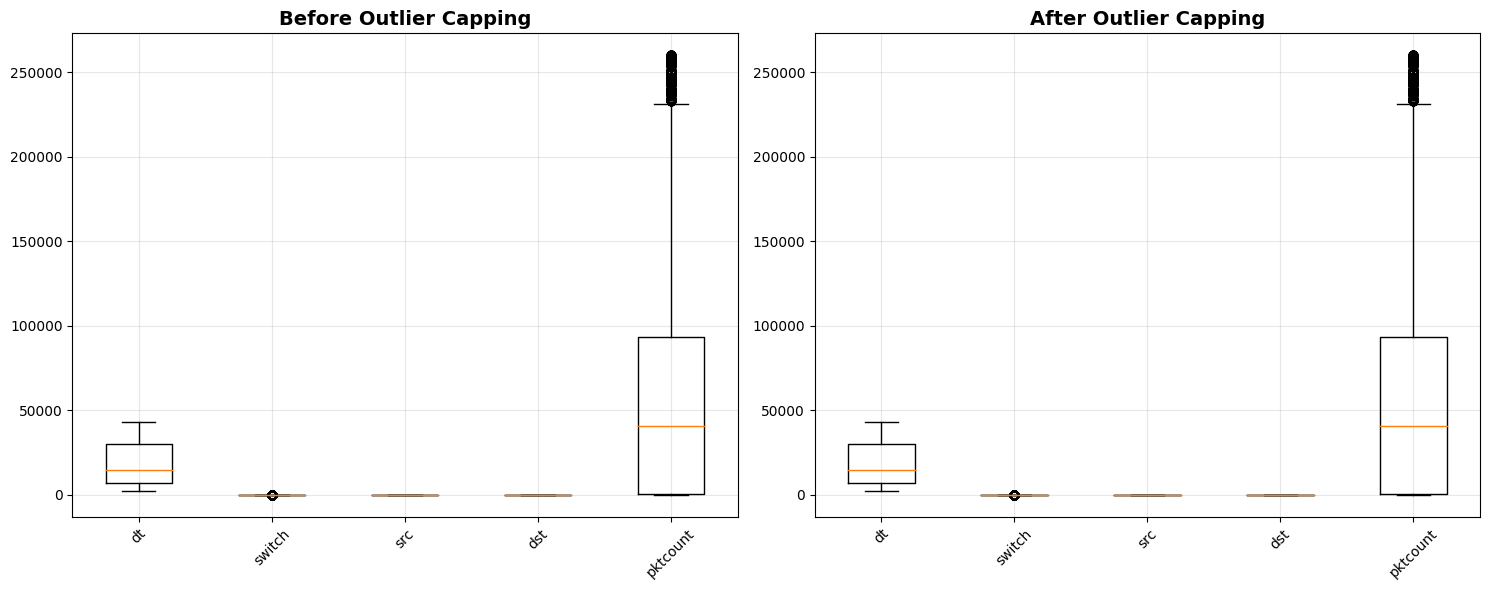

In [11]:
print("\n" + "="*60)
print("STEP 3: OUTLIER CAPPING - TRAINING DATA ONLY")
print("="*60)

def cap_outliers_improved(df, exclude_cols=None):
    """
    Cap outliers using IQR method (3*IQR instead of removing rows)
    """
    df_clean = df.copy()
    
    if exclude_cols is None:
        exclude_cols = []
    
    numeric_cols = [col for col in df_clean.select_dtypes(include='number').columns 
                    if col not in exclude_cols]
    
    outlier_counts = {}
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 3 * IQR  # 3*IQR (less aggressive than 1.5*IQR)
        upper = Q3 + 3 * IQR
        
        # Count outliers before capping
        outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
        outlier_counts[col] = outliers
        
        # Cap outliers (don't remove rows)
        df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)
    
    print(f"✓ Outliers CAPPED (not removed) - Zero rows lost")
    print(f"\nTop 10 features with most outliers capped:")
    for col, count in sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        if count > 0:
            print(f"  {col}: {count} values capped")
    
    return df_clean

# Apply ONLY to training data
Xtrain_df = pd.DataFrame(Xtrain, columns=X.columns)
Xtrain_clean = cap_outliers_improved(Xtrain_df)

print(f"\nTraining set after capping: {Xtrain_clean.shape}")
print(f"Test set (unchanged): {Xtest.shape}")
print(f"✓ No data leakage - test data untouched")

# Visualization: Before vs After
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
numeric_cols = Xtrain_clean.select_dtypes(include='number').columns[:5]

axes[0].boxplot([Xtrain[col] for col in numeric_cols], labels=numeric_cols)
axes[0].set_title('Before Outlier Capping', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot([Xtrain_clean[col] for col in numeric_cols], labels=numeric_cols)
axes[1].set_title('After Outlier Capping', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
print("\n" + "="*60)
print("STEP 4: Z-SCORE STANDARDIZATION")
print("="*60)

def zscore_standardization(data, feature_names=None):
    """Apply Z-Score Standardization"""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    if feature_names is not None:
        scaled_df = pd.DataFrame(scaled_data, columns=feature_names)
        return scaled_df, scaler
    return scaled_data, scaler

# Apply to cleaned training data
Xtrain_scaled, scaler = zscore_standardization(
    Xtrain_clean,
    Xtrain_clean.columns.tolist()
)

# Transform test data with TRAINING scaler (prevents data leakage)
Xtest_scaled = scaler.transform(Xtest)

# Convert to DataFrames
Xtrain_scaled_df = pd.DataFrame(Xtrain_scaled, columns=Xtrain_clean.columns)
Xtest_scaled_df = pd.DataFrame(Xtest_scaled, columns=Xtest.columns)

print("Training Set Statistics (after standardization):")
print(f"Mean: {Xtrain_scaled_df.mean().round(6).values}")
print(f"Std: {Xtrain_scaled_df.std().round(6).values}")

print("\nTest Set Statistics (using training scaler):")
print(f"Mean: {Xtest_scaled_df.mean().round(4).values}")
print(f"Std: {Xtest_scaled_df.std().round(4).values}")

print(f"\n✓ Training data: {Xtrain_scaled.shape}")
print(f"✓ Test data: {Xtest_scaled.shape}")


STEP 4: Z-SCORE STANDARDIZATION
Training Set Statistics (after standardization):
Mean: [ 0.  0. -0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.
 -0.  0.  0.  0.]
Std: [1.000006 1.000006 1.000006 1.000006 1.000006 1.000006 1.000006 1.000006
 1.000006 1.000006 1.000006 1.000006 1.000006 1.000006 1.000006 1.000006
 1.000006 1.000006 1.000006 1.000006 1.000006 1.000006]

Test Set Statistics (using training scaler):
Mean: [ 5.0000e-03 -2.1000e-03 -3.9000e-03 -5.5000e-03 -3.6000e-03 -7.3000e-03
  2.0000e-04 -1.2000e-03  1.0000e-04  3.5000e-03  4.7000e-03 -1.8800e-02
 -1.9800e-02 -1.8800e-02 -1.6000e-03  8.3000e-03 -6.0000e-04  2.4000e-02
  4.9000e-03  1.8472e+00  3.5390e-01  6.1000e-03]
Std: [1.0015 0.9962 1.0026 1.0003 1.0072 0.9993 1.0432 0.9968 1.043  0.9991
 1.0008 1.2516 1.2319 1.2513 1.0005 0.9998 1.0047 1.0837 1.0354 5.8349
 1.9226 1.0126]

✓ Training data: (79403, 22)
✓ Test data: (19851, 22)



STEP 5: DATA BALANCING WITH ADASYN
Before ADASYN:
  Shape: (79403, 22)
  Class distribution:
label
0    48998
1    30405
Name: count, dtype: int64

After ADASYN:
  Shape: (98655, 22)
  Class distribution:
label
1    49657
0    48998
Name: count, dtype: int64


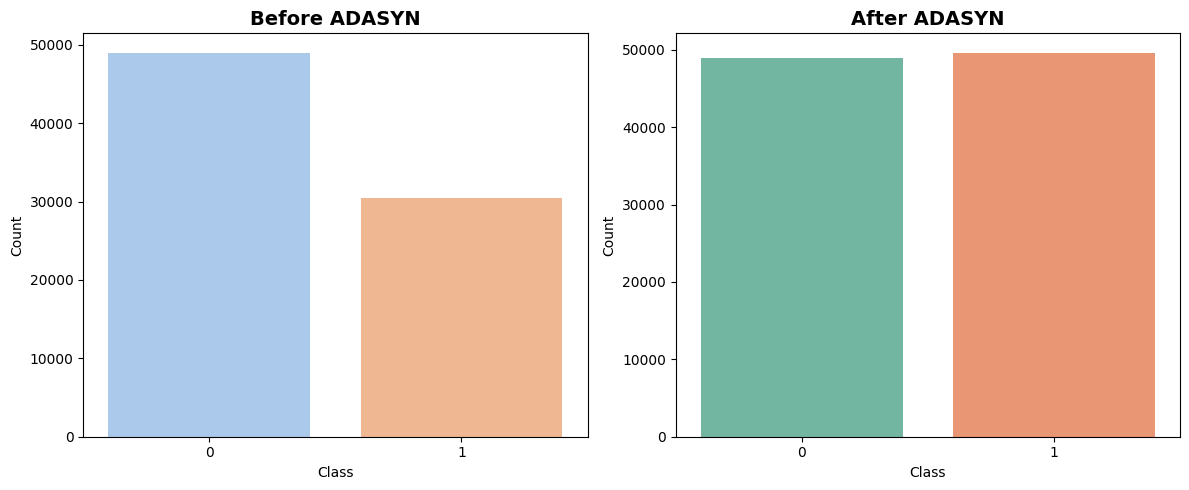


DATA PREPARATION COMPLETE
✓ Training data: (98655, 22)
✓ Test data: (19851, 22)
✓ No data leakage - proper workflow maintained


In [13]:
print("\n" + "="*60)
print("STEP 5: DATA BALANCING WITH ADASYN")
print("="*60)

# Option 1: ADASYN (Recommended)
adasyn = ADASYN(random_state=42, n_neighbors=5)
Xtrain_res, ytrain_res = adasyn.fit_resample(Xtrain_scaled, ytrain)

# Option 2: SMOTE + Tomek Links (uncomment to use)
# smote_tomek = SMOTETomek(random_state=42)
# Xtrain_res, ytrain_res = smote_tomek.fit_resample(Xtrain_scaled, ytrain)

print("Before ADASYN:")
print(f"  Shape: {Xtrain_scaled.shape}")
print(f"  Class distribution:\n{ytrain.value_counts()}")

print("\nAfter ADASYN:")
print(f"  Shape: {Xtrain_res.shape}")
print(f"  Class distribution:\n{pd.Series(ytrain_res).value_counts()}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=ytrain, ax=axes[0], palette='pastel')
axes[0].set_title('Before ADASYN', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

sns.countplot(x=ytrain_res, ax=axes[1], palette='Set2')
axes[1].set_title('After ADASYN', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DATA PREPARATION COMPLETE")
print("="*60)
print(f"✓ Training data: {Xtrain_res.shape}")
print(f"✓ Test data: {Xtest_scaled.shape}")
print(f"✓ No data leakage - proper workflow maintained")
print("="*60)

FEATURE IMPORTANCE & SHAP ANALYSIS

Training Random Forest for Feature Importance...

Top 15 Important Features:
byteperflow    0.169438
bytecount      0.151503
pktperflow     0.137368
pktcount       0.134185
pktrate        0.131151
packetins      0.099395
tot_dur        0.036436
dur            0.033401
Protocol       0.027560
dt             0.024208
src            0.014031
dst            0.012772
tot_kbps       0.005861
Pairflow       0.004459
tx_bytes       0.004048
dtype: float64


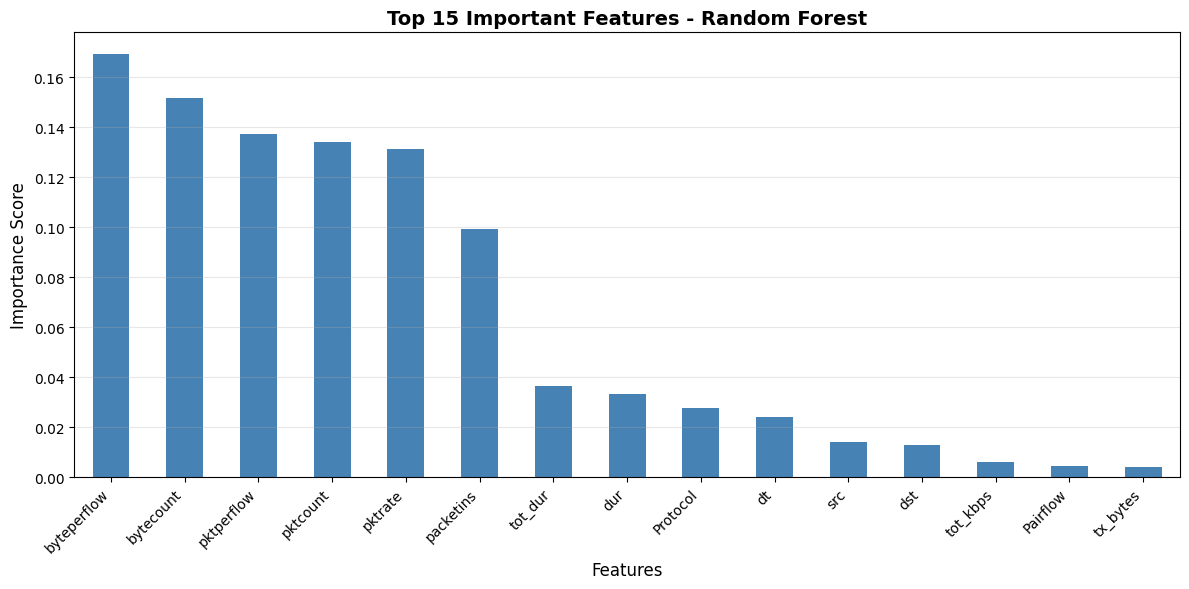


PERFORMING SHAP ANALYSIS
Creating TreeExplainer...
Calculating SHAP values for test set...

Generating SHAP summary plots...


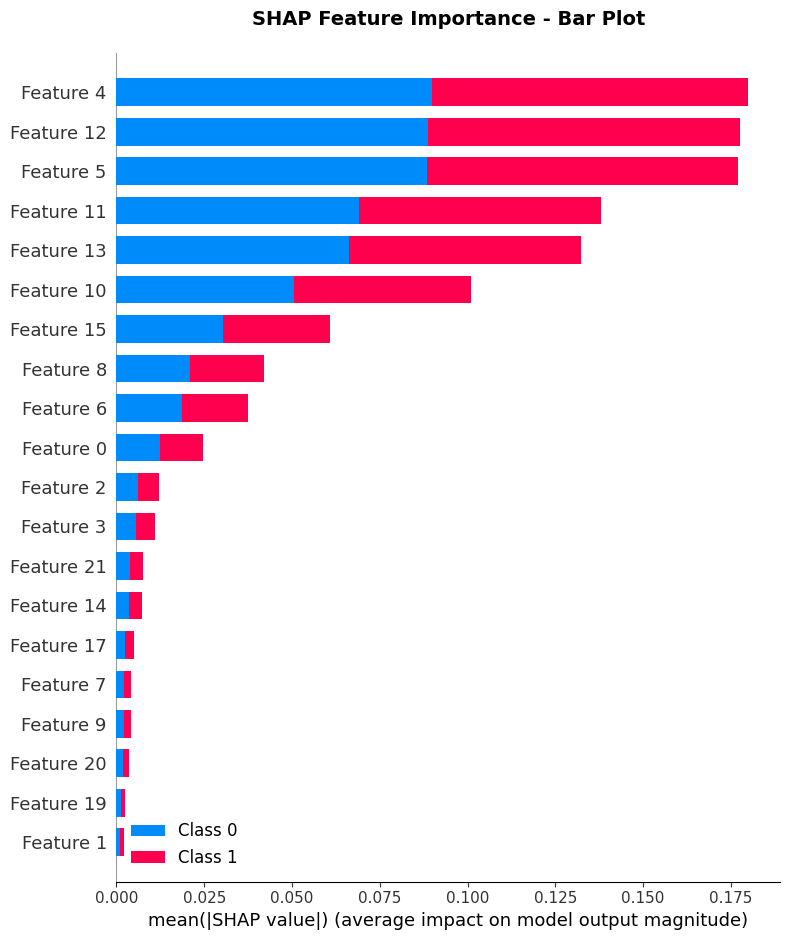

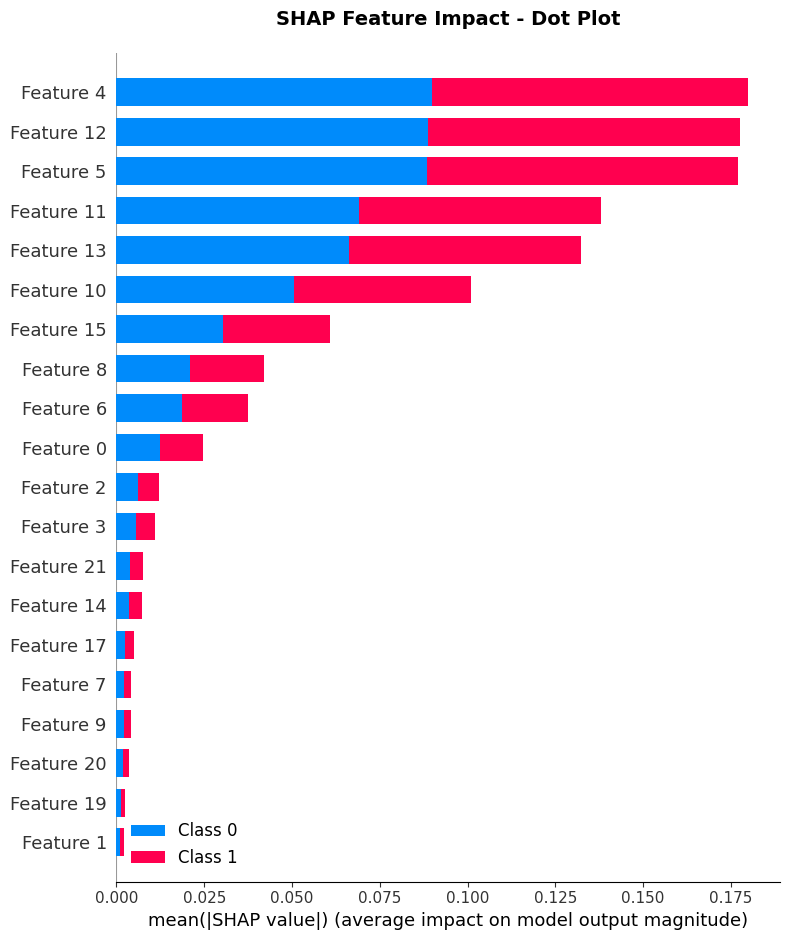


SHAP analysis for Malicious class (Class 1):


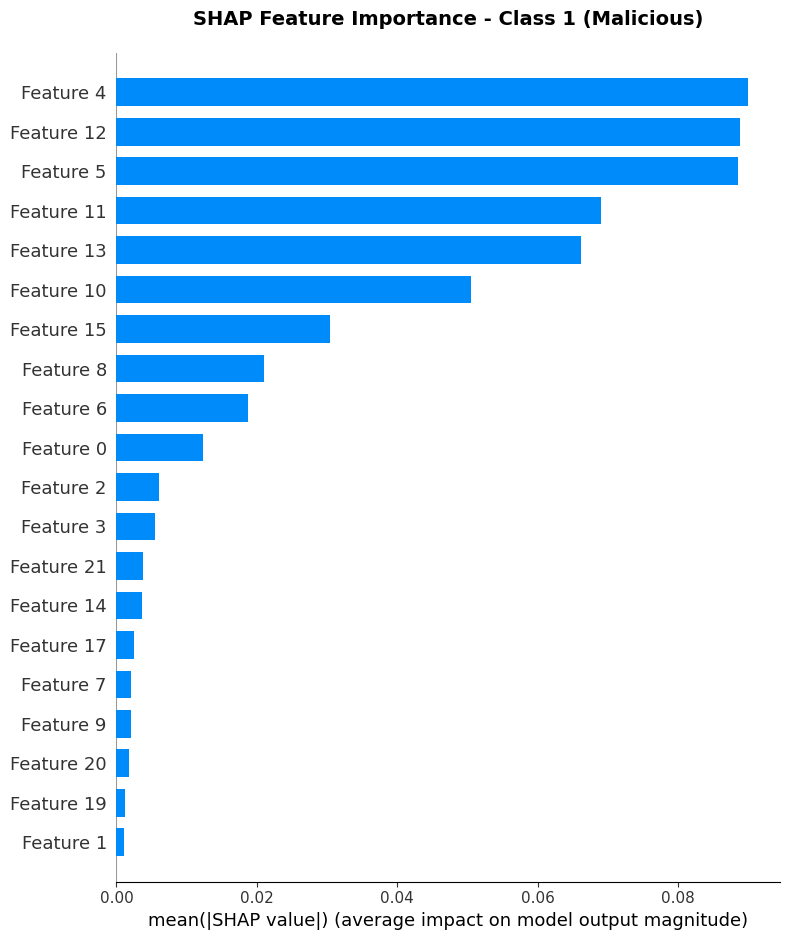


COMPARING FEATURE IMPORTANCE METHODS

Top 10 Features - Comparison:
       Feature  RF_Importance  SHAP_Importance  RF_Normalized  SHAP_Normalized
0  byteperflow       0.169438         0.012285       1.000000         0.136498
1    bytecount       0.151503         0.001010       0.894148         0.011228
2   pktperflow       0.137368         0.006095       0.810724         0.067717
3     pktcount       0.134185         0.005540       0.791942         0.061561
4      pktrate       0.131151         0.090000       0.774037         1.000000
5    packetins       0.099395         0.088496       0.586613         0.983290
6      tot_dur       0.036436         0.018712       0.215042         0.207916
7          dur       0.033401         0.002131       0.197127         0.023675
8     Protocol       0.027560         0.021026       0.162656         0.233620
9           dt       0.024208         0.002006       0.142875         0.022285


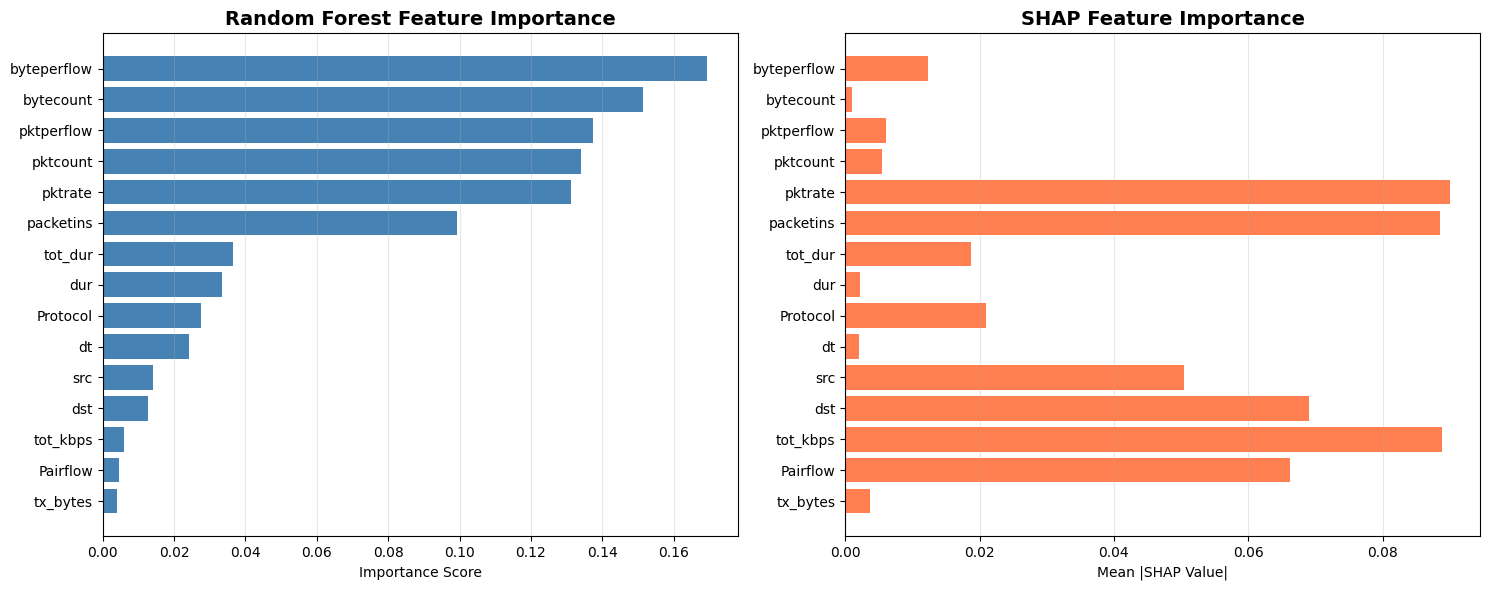


FEATURE IMPORTANCE ANALYSIS COMPLETE


In [14]:
# ================================================================
# CELL 9: FEATURE IMPORTANCE & SHAP ANALYSIS
# ================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import shap

print("="*60)
print("FEATURE IMPORTANCE & SHAP ANALYSIS")
print("="*60)

# ================================================================
# 1. RANDOM FOREST FEATURE IMPORTANCE
# ================================================================
print("\nTraining Random Forest for Feature Importance...")

# Train Random Forest on balanced data
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(Xtrain_res, ytrain_res)

# Get feature importances
importances = pd.Series(
    rf.feature_importances_, 
    index=Xtrain_clean.columns
).sort_values(ascending=False)

print(f"\nTop 15 Important Features:")
print(importances.head(15))

# Visualization: Feature Importance Bar Chart
plt.figure(figsize=(12, 6))
importances.head(15).plot(kind='bar', color='steelblue')
plt.title('Top 15 Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ================================================================
# 2. SHAP (SHapley Additive exPlanations) ANALYSIS
# ================================================================
print("\n" + "="*60)
print("PERFORMING SHAP ANALYSIS")
print("="*60)

# Create SHAP explainer
print("Creating TreeExplainer...")
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for test data
print("Calculating SHAP values for test set...")
shap_values = explainer.shap_values(Xtest_scaled)

# SHAP Summary Plot (Bar) - Feature Importance
print("\nGenerating SHAP summary plots...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, Xtest_scaled, plot_type='bar', show=False)
plt.title('SHAP Feature Importance - Bar Plot', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary Plot (Dot) - Feature Impact with Distribution
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, Xtest_scaled, show=False)
plt.title('SHAP Feature Impact - Dot Plot', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary for Class 1 (Malicious) - if binary classification
if len(shap_values) == 2:  # Binary classification
    print("\nSHAP analysis for Malicious class (Class 1):")
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values[1], Xtest_scaled, plot_type='bar', show=False)
    plt.title('SHAP Feature Importance - Class 1 (Malicious)', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# ================================================================
# 3. FEATURE IMPORTANCE COMPARISON
# ================================================================
print("\n" + "="*60)
print("COMPARING FEATURE IMPORTANCE METHODS")
print("="*60)

# Create comparison DataFrame
feature_comparison = pd.DataFrame({
    'Feature': importances.index,
    'RF_Importance': importances.values
})

# Add mean absolute SHAP values
if len(shap_values) == 2:
    mean_shap = np.abs(shap_values[1]).mean(axis=0)
else:
    mean_shap = np.abs(shap_values).mean(axis=0)

feature_comparison['SHAP_Importance'] = mean_shap

# Normalize for comparison
feature_comparison['RF_Normalized'] = (
    feature_comparison['RF_Importance'] / feature_comparison['RF_Importance'].max()
)
feature_comparison['SHAP_Normalized'] = (
    feature_comparison['SHAP_Importance'] / feature_comparison['SHAP_Importance'].max()
)

# Sort by Random Forest importance
feature_comparison = feature_comparison.sort_values('RF_Importance', ascending=False)

print("\nTop 10 Features - Comparison:")
print(feature_comparison.head(10))

# Visualization: Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest
axes[0].barh(feature_comparison['Feature'].head(15), 
             feature_comparison['RF_Importance'].head(15), 
             color='steelblue')
axes[0].set_title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importance Score')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# SHAP
axes[1].barh(feature_comparison['Feature'].head(15), 
             feature_comparison['SHAP_Importance'].head(15), 
             color='coral')
axes[1].set_title('SHAP Feature Importance', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mean |SHAP Value|')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS COMPLETE")
print("="*60)


t-SNE VISUALIZATION OF FEATURES POST-ADASYN

Applying t-SNE dimensionality reduction...
This may take a few minutes for large datasets...

t-SNE transformation complete!
Original shape: (98655, 22)
t-SNE shape: (98655, 2)

t-SNE DataFrame created:
         Dim1        Dim2  Label
0  -20.549614 -130.577026      0
1  -17.807932  -23.424694      1
2 -120.064430  -47.627411      0
3   33.967621 -119.122498      1
4   81.994881  -73.124023      1

Class distribution:
Label
1    49657
0    48998
Name: count, dtype: int64

Generating t-SNE scatter plot...


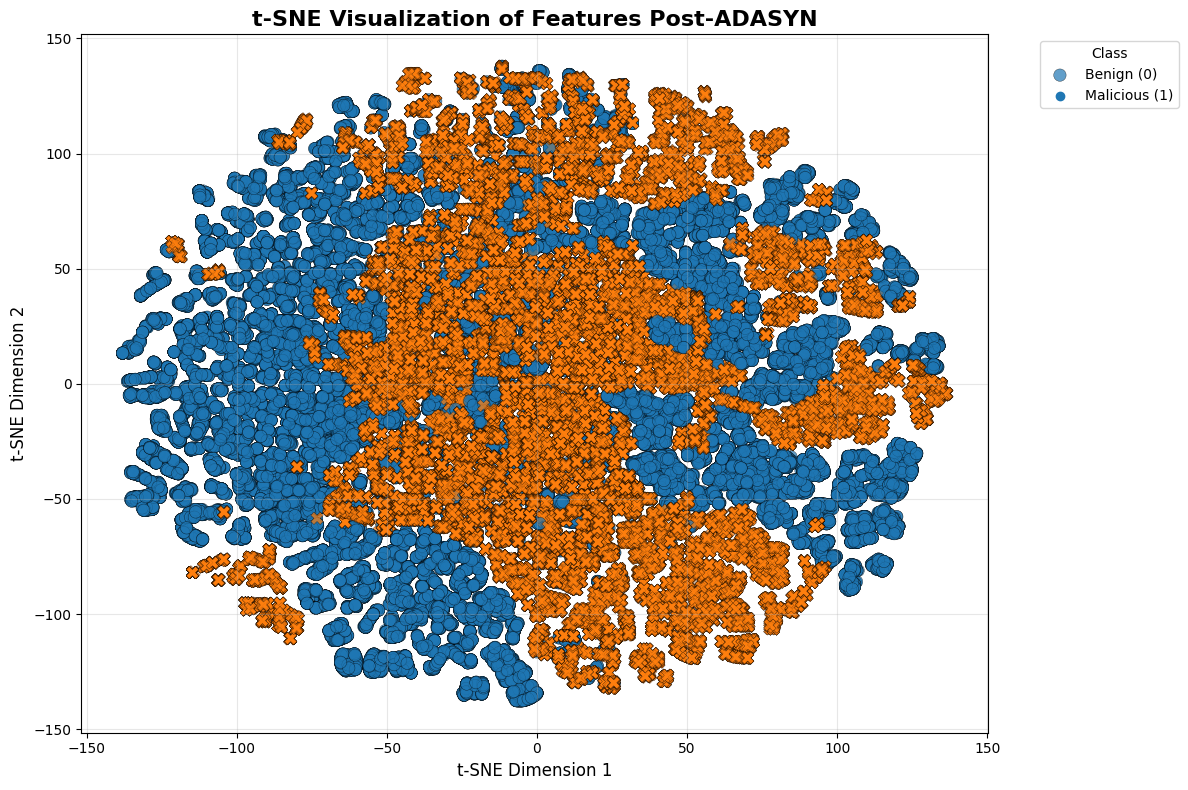


Generating density plots for each class...


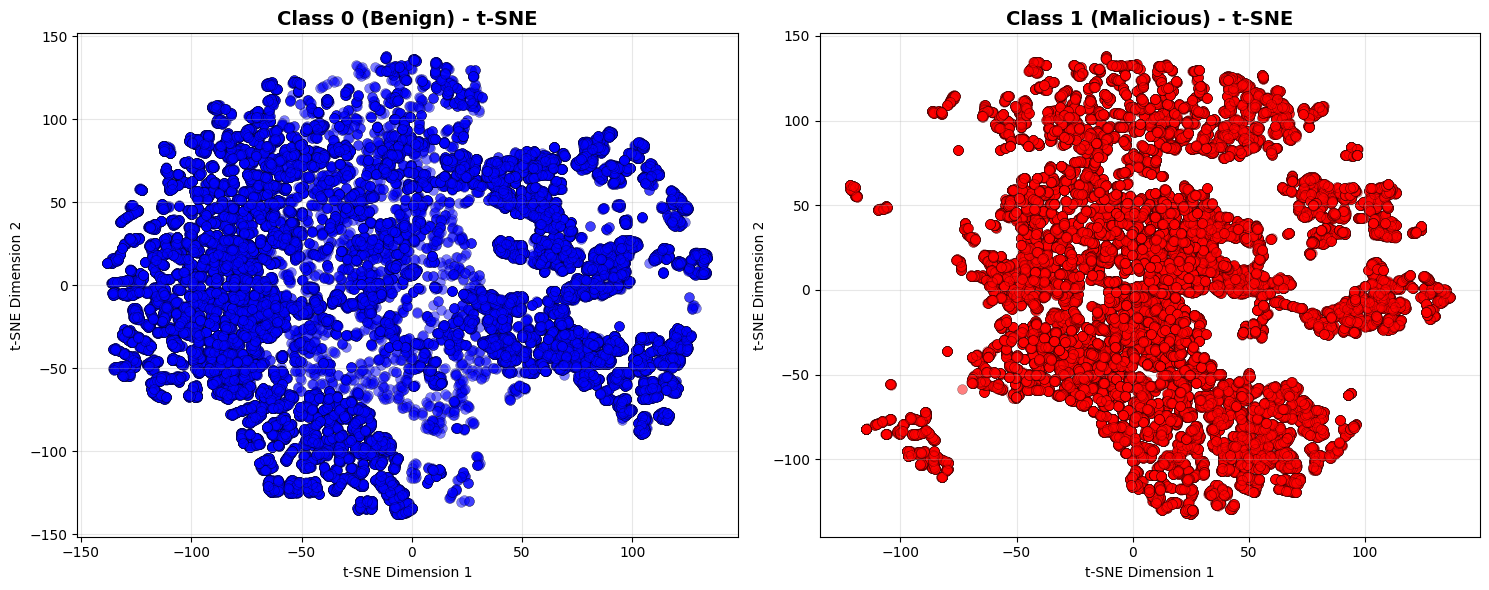


Generating hexbin density plot...


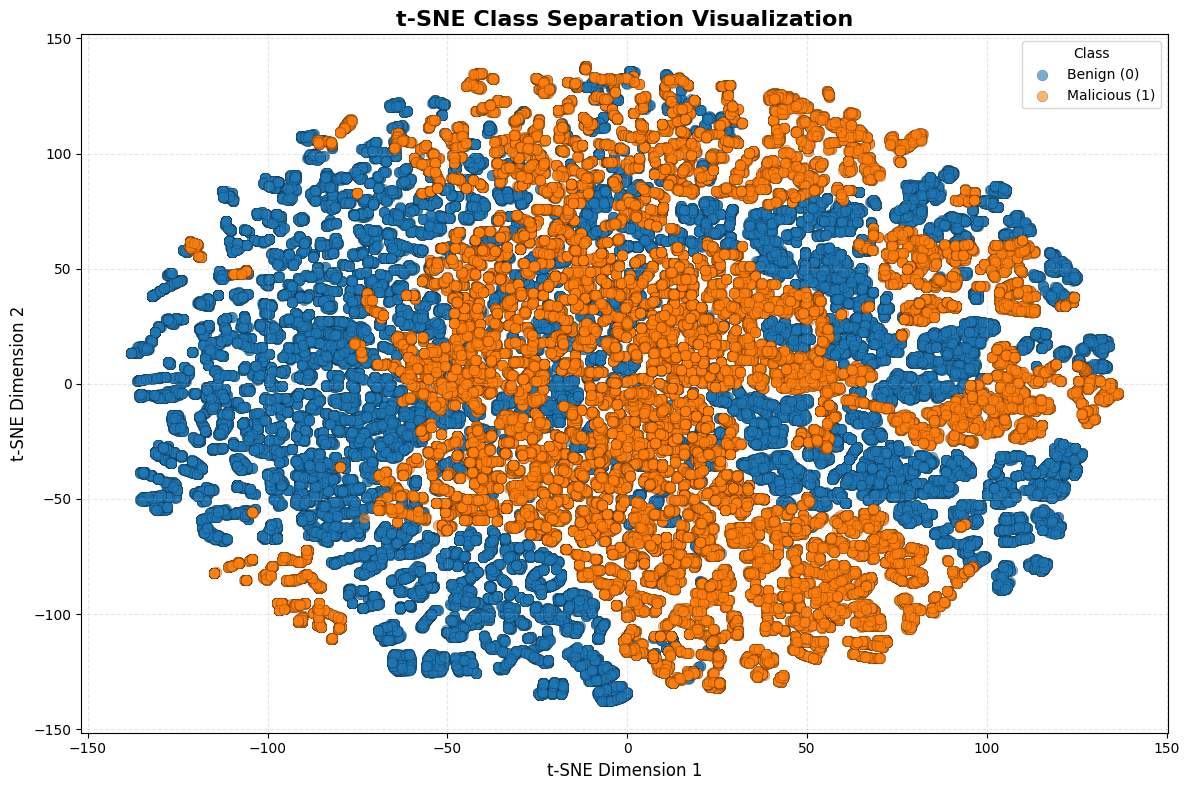


t-SNE STATISTICAL SUMMARY

Dimension 1 Statistics:
  Mean: -0.1485
  Std: 63.8295
  Min: -138.0618
  Max: 136.5599

Dimension 2 Statistics:
  Mean: -0.2881
  Std: 63.4697
  Min: -137.7591
  Max: 138.0008

Class Separation Analysis:

Class 0 Center: Dim1=-14.8045, Dim2=-2.1380
Class 1 Center: Dim1=14.3131, Dim2=1.5371

Distance between class centers: 29.3487

t-SNE VISUALIZATION COMPLETE

Key Insights:
- Clear separation indicates distinguishable classes
- Overlapping regions suggest challenging classification areas
- Cluster density shows class distribution patterns


In [15]:
# ================================================================
# CELL 10: t-SNE VISUALIZATION (FINAL, FIXED VERSION)
# ================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

print("="*60)
print("t-SNE VISUALIZATION OF FEATURES POST-ADASYN")
print("="*60)

# ================================================================
# 1. APPLY t-SNE DIMENSIONALITY REDUCTION
# ================================================================
print("\nApplying t-SNE dimensionality reduction...")
print("This may take a few minutes for large datasets...")

# Remove n_iter argument (use defaults for compatibility)
tsne = TSNE(
    n_components=2,           # 2D visualization
    random_state=42,          # For reproducibility
    learning_rate='auto',     # Or use a float, e.g., 200 if you prefer
    init='pca',               # PCA initialization
    perplexity=30             # Default perplexity
)

Xtrain_tsne = tsne.fit_transform(Xtrain_res)

print(f"\nt-SNE transformation complete!")
print(f"Original shape: {Xtrain_res.shape}")
print(f"t-SNE shape: {Xtrain_tsne.shape}")

# ================================================================
# 2. CREATE DATAFRAME FOR PLOTTING
# ================================================================
tsne_df = pd.DataFrame(
    data=Xtrain_tsne, 
    columns=['Dim1', 'Dim2']
)
tsne_df['Label'] = ytrain_res

print(f"\nt-SNE DataFrame created:")
print(tsne_df.head())
print(f"\nClass distribution:")
print(tsne_df['Label'].value_counts())

# ================================================================
# 3. VISUALIZATION: t-SNE SCATTER PLOT
# ================================================================
print("\nGenerating t-SNE scatter plot...")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tsne_df, 
    x='Dim1', 
    y='Dim2', 
    hue='Label',
    palette='tab10',          # Color palette
    style='Label',            # Different markers for each class
    s=80,                     # Marker size
    alpha=0.7,                # Transparency
    edgecolor='k',            # Black edge for markers
    linewidth=0.3
)

plt.title('t-SNE Visualization of Features Post-ADASYN', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.legend(title='Class', labels=['Benign (0)', 'Malicious (1)'], 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ================================================================
# 4. ALTERNATIVE VISUALIZATION: DENSITY PLOT
# ================================================================
print("\nGenerating density plots for each class...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Class 0 (Benign)
class_0_data = tsne_df[tsne_df['Label'] == 0]
axes[0].scatter(class_0_data['Dim1'], class_0_data['Dim2'], 
                c='blue', alpha=0.5, s=50, edgecolor='k', linewidth=0.3)
axes[0].set_title('Class 0 (Benign) - t-SNE', fontsize=14, fontweight='bold')
axes[0].set_xlabel('t-SNE Dimension 1')
axes[0].set_ylabel('t-SNE Dimension 2')
axes[0].grid(True, alpha=0.3)

# Plot for Class 1 (Malicious)
class_1_data = tsne_df[tsne_df['Label'] == 1]
axes[1].scatter(class_1_data['Dim1'], class_1_data['Dim2'], 
                c='red', alpha=0.5, s=50, edgecolor='k', linewidth=0.3)
axes[1].set_title('Class 1 (Malicious) - t-SNE', fontsize=14, fontweight='bold')
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================================================
# 5. HEXBIN PLOT FOR DENSITY VISUALIZATION
# ================================================================
print("\nGenerating hexbin density plot...")

plt.figure(figsize=(12, 8))

for label in [0, 1]:
    class_data = tsne_df[tsne_df['Label'] == label]
    plt.scatter(class_data['Dim1'], class_data['Dim2'], 
                label=f'Class {label}', 
                alpha=0.6, s=60, edgecolor='k', linewidth=0.2)

plt.title('t-SNE Class Separation Visualization', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.legend(title='Class', labels=['Benign (0)', 'Malicious (1)'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ================================================================
# 6. STATISTICAL SUMMARY
# ================================================================
print("\n" + "="*60)
print("t-SNE STATISTICAL SUMMARY")
print("="*60)

print("\nDimension 1 Statistics:")
print(f"  Mean: {tsne_df['Dim1'].mean():.4f}")
print(f"  Std: {tsne_df['Dim1'].std():.4f}")
print(f"  Min: {tsne_df['Dim1'].min():.4f}")
print(f"  Max: {tsne_df['Dim1'].max():.4f}")

print("\nDimension 2 Statistics:")
print(f"  Mean: {tsne_df['Dim2'].mean():.4f}")
print(f"  Std: {tsne_df['Dim2'].std():.4f}")
print(f"  Min: {tsne_df['Dim2'].min():.4f}")
print(f"  Max: {tsne_df['Dim2'].max():.4f}")

print("\nClass Separation Analysis:")
class_0_center = tsne_df[tsne_df['Label'] == 0][['Dim1', 'Dim2']].mean()
class_1_center = tsne_df[tsne_df['Label'] == 1][['Dim1', 'Dim2']].mean()

print(f"\nClass 0 Center: Dim1={class_0_center['Dim1']:.4f}, Dim2={class_0_center['Dim2']:.4f}")
print(f"Class 1 Center: Dim1={class_1_center['Dim1']:.4f}, Dim2={class_1_center['Dim2']:.4f}")

distance = np.sqrt((class_0_center['Dim1'] - class_1_center['Dim1'])**2 + 
                   (class_0_center['Dim2'] - class_1_center['Dim2'])**2)
print(f"\nDistance between class centers: {distance:.4f}")

print("\n" + "="*60)
print("t-SNE VISUALIZATION COMPLETE")
print("="*60)
print("\nKey Insights:")
print("- Clear separation indicates distinguishable classes")
print("- Overlapping regions suggest challenging classification areas")
print("- Cluster density shows class distribution patterns")
print("="*60)


In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Convert to NumPy arrays if they are DataFrames
if isinstance(Xtrain_res, pd.DataFrame):
    Xtrain_arr = Xtrain_res.values
else:
    Xtrain_arr = Xtrain_res

if isinstance(ytrain_res, pd.Series) or isinstance(ytrain_res, pd.DataFrame):
    ytrain_arr = ytrain_res.values
else:
    ytrain_arr = ytrain_res

if isinstance(Xtest_scaled, pd.DataFrame):
    Xtest_arr = Xtest_scaled.values
else:
    Xtest_arr = Xtest_scaled

if isinstance(ytest, pd.Series) or isinstance(ytest, pd.DataFrame):
    ytest_arr = ytest.values
else:
    ytest_arr = ytest

# Now create datasets and dataloaders
train_dataset = TensorDataset(
    torch.FloatTensor(Xtrain_arr),
    torch.LongTensor(ytrain_arr)
)
test_dataset = TensorDataset(
    torch.FloatTensor(Xtest_arr),
    torch.LongTensor(ytest_arr)
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Using device: cpu


In [17]:
# ================================================================
# CELL 11: PREPARE DATA LOADERS FOR TRANSFORMER (FIXED)
# ================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

print("="*60)
print("PREPARING DATA FOR TRANSFORMER MODEL")
print("="*60)

# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Ensure all arrays are numpy arrays, not DataFrames or Series
def ensure_numpy(x):
    if isinstance(x, (pd.DataFrame, pd.Series)):
        return x.values
    return x

Xtrain_np = ensure_numpy(Xtrain_res)
ytrain_np = ensure_numpy(ytrain_res)
Xtest_np = ensure_numpy(Xtest_scaled)
ytest_np = ensure_numpy(ytest) if not hasattr(ytest, "values") else ytest.values

# Create TensorDatasets
print("\nCreating TensorDatasets...")
train_dataset = TensorDataset(
    torch.FloatTensor(Xtrain_np),
    torch.LongTensor(ytrain_np)
)
test_dataset = TensorDataset(
    torch.FloatTensor(Xtest_np),
    torch.LongTensor(ytest_np)
)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# Create DataLoaders
print("\nCreating DataLoaders...")
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=0  # Set to 0 for Kaggle/Colab
)
test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=0
)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")
print(f"Batch size: 64")

print("\n" + "="*60)
print("DATA LOADERS READY FOR TRAINING")
print("="*60)


PREPARING DATA FOR TRANSFORMER MODEL
Using device: cpu

Creating TensorDatasets...
Training dataset size: 98655
Test dataset size: 19851

Creating DataLoaders...
Number of training batches: 1542
Number of test batches: 311
Batch size: 64

DATA LOADERS READY FOR TRAINING


In [18]:
# ================================================================
# CELL 12: TRANSFORMER MODEL DEFINITION
# ================================================================
import torch
import torch.nn as nn

print("="*60)
print("DEFINING TRANSFORMER CLASSIFIER MODEL")
print("="*60)

class TransformerClassifier(nn.Module):
    """
    Transformer-based binary classifier for SDN intrusion detection.
    
    Architecture:
    1. Linear embedding layer: Maps input features to d_model dimensions
    2. Transformer encoder: Multi-head attention mechanism
    3. Fully connected layer: Maps to num_classes for classification
    
    Parameters:
    -----------
    input_dim : int
        Number of input features (22 for SDN dataset)
    num_classes : int
        Number of output classes (2 for binary classification)
    d_model : int, default=64
        Dimension of the model (embedding size)
    nhead : int, default=4
        Number of attention heads (must divide d_model evenly)
    num_layers : int, default=2
        Number of transformer encoder layers
    dim_feedforward : int, default=128
        Dimension of feedforward network
    dropout : float, default=0.1
        Dropout rate for regularization
    """
    
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, 
                 num_layers=2, dim_feedforward=128, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        
        # Store parameters
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.d_model = d_model
        
        # 1. Embedding Layer
        # Maps input features from input_dim to d_model dimensions
        self.embedding = nn.Linear(input_dim, d_model)
        
        # 2. Transformer Encoder Layer
        # Defines a single transformer encoder layer with:
        # - Multi-head self-attention
        # - Feedforward network
        # - Layer normalization
        # - Residual connections
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,              # Model dimension
            nhead=nhead,                  # Number of attention heads
            dim_feedforward=dim_feedforward,  # FFN dimension
            dropout=dropout,              # Dropout probability
            batch_first=True              # Batch dimension first (B, S, E)
        )
        
        # 3. Stack Multiple Transformer Encoder Layers
        self.transformer = nn.TransformerEncoder(
            encoder_layer, 
            num_layers=num_layers
        )
        
        # 4. Final Classification Layer
        # Maps from d_model to num_classes
        self.fc = nn.Linear(d_model, num_classes)
        
        # Print model architecture
        print(f"\nModel Architecture:")
        print(f"  Input Dimension: {input_dim}")
        print(f"  Embedding Dimension (d_model): {d_model}")
        print(f"  Number of Attention Heads: {nhead}")
        print(f"  Number of Encoder Layers: {num_layers}")
        print(f"  Feedforward Dimension: {dim_feedforward}")
        print(f"  Dropout Rate: {dropout}")
        print(f"  Output Classes: {num_classes}")
        
    def forward(self, x):
        """
        Forward pass through the transformer.
        
        Parameters:
        -----------
        x : torch.Tensor
            Input tensor of shape (batch_size, input_dim)
            
        Returns:
        --------
        torch.Tensor
            Output logits of shape (batch_size, num_classes)
        """
        # x shape: (batch_size, input_dim)
        
        # 1. Apply embedding layer
        # Output shape: (batch_size, d_model)
        x = self.embedding(x)
        
        # 2. Add sequence dimension for transformer
        # Output shape: (batch_size, 1, d_model)
        # Transformer expects (batch, sequence_length, features)
        x = x.unsqueeze(1)
        
        # 3. Pass through transformer encoder
        # Output shape: (batch_size, 1, d_model)
        x = self.transformer(x)
        
        # 4. Remove sequence dimension
        # Output shape: (batch_size, d_model)
        x = x.squeeze(1)
        
        # 5. Apply final classification layer
        # Output shape: (batch_size, num_classes)
        x = self.fc(x)
        
        return x
    
    def get_attention_weights(self, x):
        """
        Extract attention weights for visualization (optional).
        
        Parameters:
        -----------
        x : torch.Tensor
            Input tensor
            
        Returns:
        --------
        torch.Tensor
            Attention weights
        """
        x = self.embedding(x)
        x = x.unsqueeze(1)
        # Note: Extracting attention weights requires modifying
        # the transformer encoder to return them
        return self.transformer(x)

# ================================================================
# INITIALIZE MODEL
# ================================================================
print("\n" + "="*60)
print("INITIALIZING TRANSFORMER MODEL")
print("="*60)

# Get input dimensions
input_dim = Xtrain_res.shape[1]  # Number of features (22)
num_classes = len(np.unique(ytrain))  # Number of classes (2)

print(f"\nDataset Information:")
print(f"  Input Dimension (Features): {input_dim}")
print(f"  Number of Classes: {num_classes}")
print(f"  Training Samples: {Xtrain_res.shape[0]}")
print(f"  Test Samples: {Xtest_scaled.shape[0]}")

# Create model instance
transformer_model = TransformerClassifier(
    input_dim=input_dim,
    num_classes=num_classes,
    d_model=64,           # Embedding dimension
    nhead=4,              # Number of attention heads
    num_layers=2,         # Number of transformer layers
    dim_feedforward=128,  # Feedforward network dimension
    dropout=0.1           # Dropout rate
).to(device)

# Display model summary
print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)

total_params = sum(p.numel() for p in transformer_model.parameters())
trainable_params = sum(p.numel() for p in transformer_model.parameters() if p.requires_grad)

print(f"\nTotal Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")

# Display layer-wise parameters
print("\nLayer-wise Parameter Count:")
for name, param in transformer_model.named_parameters():
    print(f"  {name:40s} {param.numel():>10,} params")

print("\n" + "="*60)
print("MODEL READY FOR TRAINING")
print("="*60)


DEFINING TRANSFORMER CLASSIFIER MODEL

INITIALIZING TRANSFORMER MODEL

Dataset Information:
  Input Dimension (Features): 22
  Number of Classes: 2
  Training Samples: 98655
  Test Samples: 19851

Model Architecture:
  Input Dimension: 22
  Embedding Dimension (d_model): 64
  Number of Attention Heads: 4
  Number of Encoder Layers: 2
  Feedforward Dimension: 128
  Dropout Rate: 0.1
  Output Classes: 2

MODEL SUMMARY

Total Parameters: 68,546
Trainable Parameters: 68,546

Layer-wise Parameter Count:
  embedding.weight                              1,408 params
  embedding.bias                                   64 params
  transformer.layers.0.self_attn.in_proj_weight     12,288 params
  transformer.layers.0.self_attn.in_proj_bias        192 params
  transformer.layers.0.self_attn.out_proj.weight      4,096 params
  transformer.layers.0.self_attn.out_proj.bias         64 params
  transformer.layers.0.linear1.weight           8,192 params
  transformer.layers.0.linear1.bias               1

In [19]:
input_dim = Xtrain_res.shape[1]
num_classes = len(np.unique(ytrain))
print(f"Input dimension: {input_dim}, Number of classes: {num_classes}")

transformer_model = TransformerClassifier(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=0.001)

print("Starting training...")
transformer_model.train()
train_losses = []

for epoch in range(50):
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = transformer_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/50, Loss: {epoch_loss/len(train_loader):.4f}")


Input dimension: 22, Number of classes: 2

Model Architecture:
  Input Dimension: 22
  Embedding Dimension (d_model): 64
  Number of Attention Heads: 4
  Number of Encoder Layers: 2
  Feedforward Dimension: 128
  Dropout Rate: 0.1
  Output Classes: 2
Starting training...
Epoch 10/50, Loss: 0.0317
Epoch 20/50, Loss: 0.0234
Epoch 30/50, Loss: 0.0167
Epoch 40/50, Loss: 0.0152
Epoch 50/50, Loss: 0.0134


Evaluating Transformer Model...


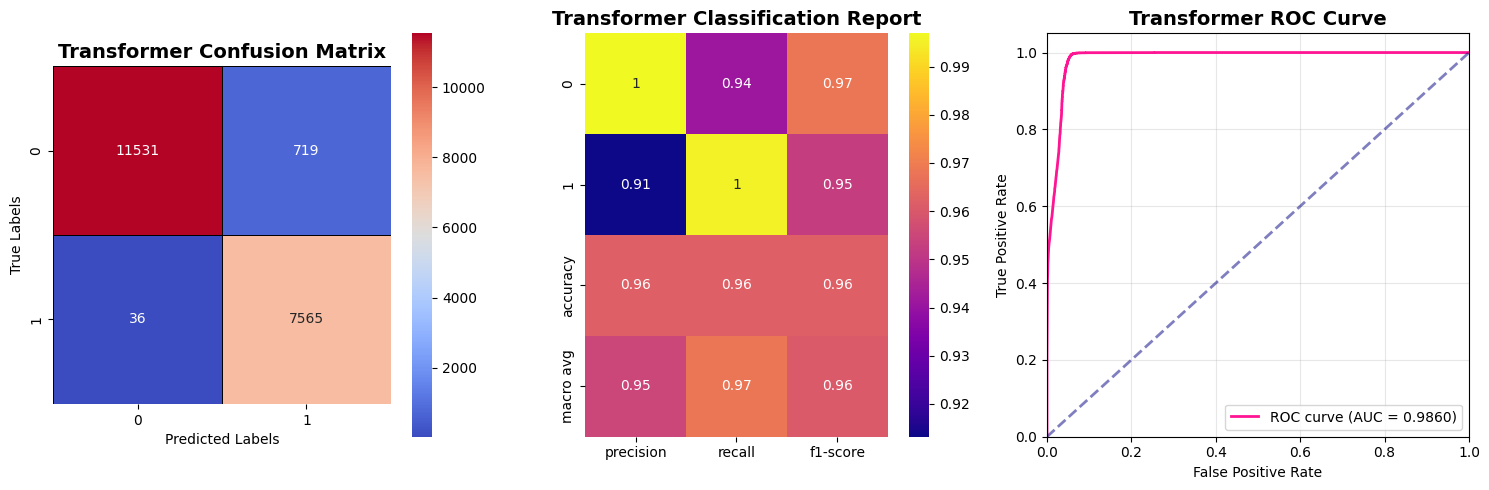

Transformer ROC-AUC Score: 0.9860

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12250
           1       0.91      1.00      0.95      7601

    accuracy                           0.96     19851
   macro avg       0.96      0.97      0.96     19851
weighted avg       0.96      0.96      0.96     19851



In [20]:
print("Evaluating Transformer Model...")
transformer_model.eval()
all_predictions = []
all_probabilities = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = transformer_model(batch_X)
        probabilities = torch.softmax(outputs, dim=1)
        predictions = torch.max(outputs, 1)[1]
        all_predictions.extend(predictions.cpu().numpy())
        all_probabilities.extend(probabilities.cpu().numpy())

ypred_transformer = np.array(all_predictions)
yprob_transformer = np.array(all_probabilities)[:, 1]

# Calculate metrics
fpr_transformer, tpr_transformer, _ = roc_curve(ytest, yprob_transformer)
rocauc_transformer = auc(fpr_transformer, tpr_transformer)

# Visualization
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
cm_transformer = confusion_matrix(ytest, ypred_transformer)
sns.heatmap(cm_transformer, annot=True, fmt='d', cmap='coolwarm', 
            cbar=True, square=True, linewidths=0.5, linecolor='black')
plt.title('Transformer Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Classification Report
plt.subplot(1, 3, 2)
cr_transformer = classification_report(ytest, ypred_transformer, output_dict=True)
cr_df_transformer = pd.DataFrame(cr_transformer).transpose().round(4)
sns.heatmap(cr_df_transformer.iloc[:-1, :-1], annot=True, cmap='plasma', 
            cbar=True, square=True)
plt.title('Transformer Classification Report', fontsize=14, fontweight='bold')

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr_transformer, tpr_transformer, color='deeppink', lw=2,
         label=f'ROC curve (AUC = {rocauc_transformer:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Transformer ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Transformer ROC-AUC Score: {rocauc_transformer:.4f}")
print("\nClassification Report:")
print(classification_report(ytest, ypred_transformer))


In [21]:
print(f"Type of Xtrain_res: {type(Xtrain_res)}")
print(f"Type of ytrain_res: {type(ytrain_res)}")

# If pandas DataFrame / Series, print their indexes and columns
if hasattr(Xtrain_res, 'index'):
    print(f"Xtrain_res index sample: {Xtrain_res.index[:10]}")
if hasattr(ytrain_res, 'index'):
    print(f"ytrain_res index sample: {ytrain_res.index[:10]}")

if hasattr(Xtrain_res, 'columns'):
    print(f"Xtrain_res columns: {Xtrain_res.columns.tolist()}")


Type of Xtrain_res: <class 'pandas.core.frame.DataFrame'>
Type of ytrain_res: <class 'pandas.core.series.Series'>
Xtrain_res index sample: RangeIndex(start=0, stop=10, step=1)
ytrain_res index sample: RangeIndex(start=0, stop=10, step=1)
Xtrain_res columns: ['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


In [22]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

print("\n" + "="*60)
print("PERFORMING 5-FOLD CROSS-VALIDATION - TRANSFORMER")
print("="*60)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_transformer = []

for fold, (train_idx, val_idx) in enumerate(skf.split(Xtrain_res, ytrain_res), 1):
    print(f"\nTraining Fold {fold}/5...")

    # Use .iloc to slice by position
    X_fold_train = Xtrain_res.iloc[train_idx]
    y_fold_train = ytrain_res.iloc[train_idx]
    X_fold_val = Xtrain_res.iloc[val_idx]
    y_fold_val = ytrain_res.iloc[val_idx]

    # Convert to tensors
    fold_train_dataset = TensorDataset(
        torch.FloatTensor(X_fold_train.values),
        torch.LongTensor(y_fold_train.values)
    )
    fold_val_dataset = TensorDataset(
        torch.FloatTensor(X_fold_val.values),
        torch.LongTensor(y_fold_val.values)
    )

    fold_train_loader = DataLoader(fold_train_dataset, batch_size=64, shuffle=True)
    fold_val_loader = DataLoader(fold_val_dataset, batch_size=64, shuffle=False)

    # Initialize model
    fold_model = TransformerClassifier(input_dim, num_classes).to(device)
    fold_criterion = nn.CrossEntropyLoss()
    fold_optimizer = optim.Adam(fold_model.parameters(), lr=0.001)

    for epoch in range(30):
        fold_model.train()
        for batch_X, batch_y in fold_train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            fold_optimizer.zero_grad()
            outputs = fold_model(batch_X)
            loss = fold_criterion(outputs, batch_y)
            loss.backward()
            fold_optimizer.step()

    fold_model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for batch_X, batch_y in fold_val_loader:
            batch_X = batch_X.to(device)
            outputs = fold_model(batch_X)
            probabilities = torch.softmax(outputs, dim=1)
            all_probs.extend(probabilities[:, 1].cpu().numpy())
            all_labels.extend(batch_y.numpy())

    fold_auc = roc_auc_score(all_labels, all_probs)
    cv_scores_transformer.append(fold_auc)
    print(f"  Fold {fold} ROC-AUC: {fold_auc:.4f}")

cv_scores_transformer = np.array(cv_scores_transformer)
print(f"\n{'='*60}")
print(f"Mean CV ROC-AUC Score: {cv_scores_transformer.mean():.4f}")
print(f"Standard Deviation: {cv_scores_transformer.std():.4f}")
print(f"{'='*60}")



PERFORMING 5-FOLD CROSS-VALIDATION - TRANSFORMER

Training Fold 1/5...

Model Architecture:
  Input Dimension: 22
  Embedding Dimension (d_model): 64
  Number of Attention Heads: 4
  Number of Encoder Layers: 2
  Feedforward Dimension: 128
  Dropout Rate: 0.1
  Output Classes: 2
  Fold 1 ROC-AUC: 0.9998

Training Fold 2/5...

Model Architecture:
  Input Dimension: 22
  Embedding Dimension (d_model): 64
  Number of Attention Heads: 4
  Number of Encoder Layers: 2
  Feedforward Dimension: 128
  Dropout Rate: 0.1
  Output Classes: 2
  Fold 2 ROC-AUC: 0.9999

Training Fold 3/5...

Model Architecture:
  Input Dimension: 22
  Embedding Dimension (d_model): 64
  Number of Attention Heads: 4
  Number of Encoder Layers: 2
  Feedforward Dimension: 128
  Dropout Rate: 0.1
  Output Classes: 2
  Fold 3 ROC-AUC: 0.9995

Training Fold 4/5...

Model Architecture:
  Input Dimension: 22
  Embedding Dimension (d_model): 64
  Number of Attention Heads: 4
  Number of Encoder Layers: 2
  Feedforward Dimens


TRAINING LOGISTIC REGRESSION


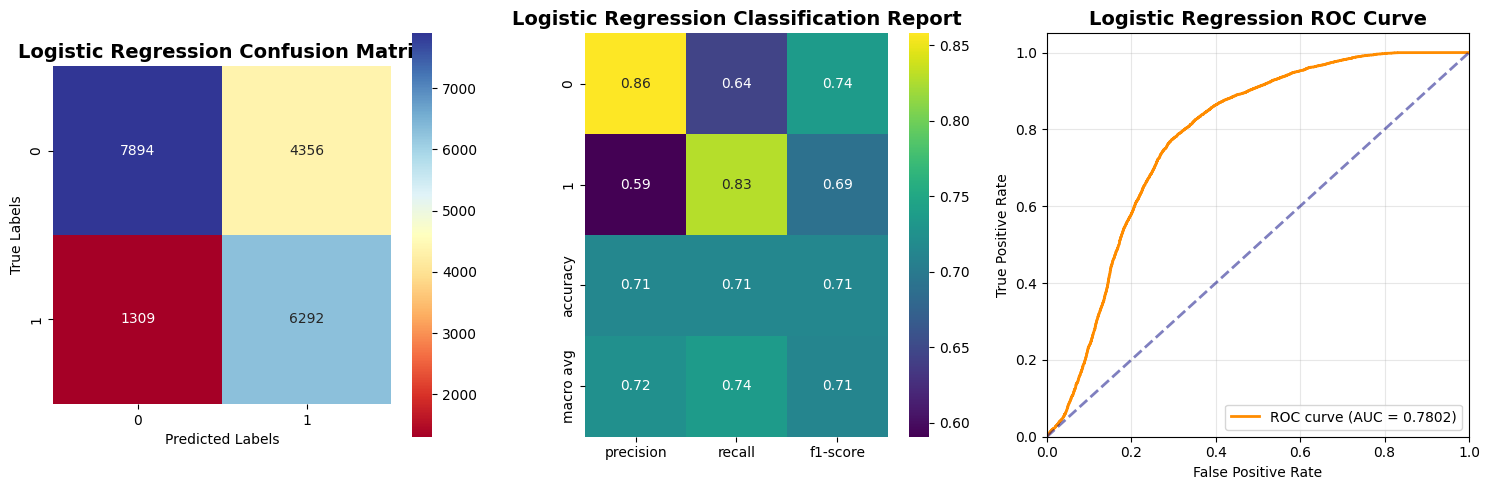

Logistic Regression ROC-AUC Score: 0.7802


In [23]:
print("\n" + "="*60)
print("TRAINING LOGISTIC REGRESSION")
print("="*60)

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(Xtrain_res, ytrain_res)

ypred_logreg = logreg_model.predict(Xtest_scaled)
yprob_logreg = logreg_model.predict_proba(Xtest_scaled)[:, 1]

# Calculate metrics
fpr_logreg, tpr_logreg, _ = roc_curve(ytest, yprob_logreg)
rocauc_logreg = auc(fpr_logreg, tpr_logreg)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm_logreg = confusion_matrix(ytest, ypred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='RdYlBu', cbar=True, square=True)
plt.title('Logistic Regression Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 3, 2)
cr_logreg = classification_report(ytest, ypred_logreg, output_dict=True)
cr_df_logreg = pd.DataFrame(cr_logreg).transpose().round(4)
sns.heatmap(cr_df_logreg.iloc[:-1, :-1], annot=True, cmap='viridis', cbar=True, square=True)
plt.title('Logistic Regression Classification Report', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {rocauc_logreg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Logistic Regression ROC-AUC Score: {rocauc_logreg:.4f}")


PERFORMING 5-FOLD CROSS-VALIDATION - LOGISTIC REGRESSION
CV scores: [0.87608839 0.86825798 0.87264817 0.8721822  0.86982053]

Cross-Validation ROC-AUC Scores per Fold:
  Fold 1: 0.8761
  Fold 2: 0.8683
  Fold 3: 0.8726
  Fold 4: 0.8722
  Fold 5: 0.8698

Mean CV ROC-AUC Score: 0.8718
Standard Deviation: 0.0027


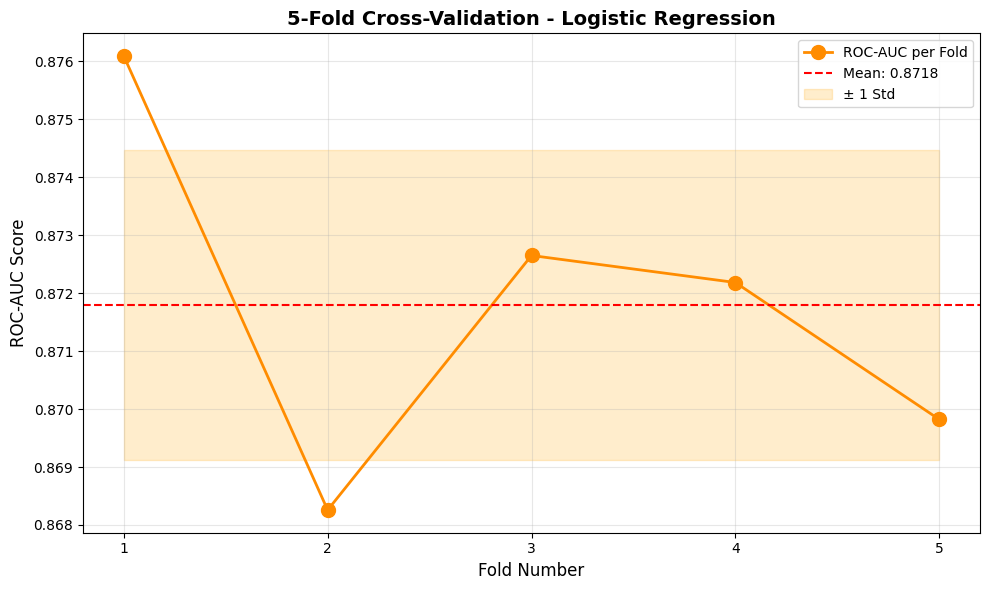

In [24]:
import numpy as np
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("PERFORMING 5-FOLD CROSS-VALIDATION - LOGISTIC REGRESSION")
print("="*60)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    logreg_model,
    Xtrain_res,
    ytrain_res,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

print("CV scores:", cv_scores)
print(f"\nCross-Validation ROC-AUC Scores per Fold:")
for fold, score in enumerate(cv_scores, 1):
    print(f"  Fold {fold}: {score:.4f}")

print(f"\nMean CV ROC-AUC Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Visualization - Improved
plt.figure(figsize=(10, 6))
xvals = np.arange(1, len(cv_scores)+1)
plt.plot(xvals, cv_scores, marker='o', linestyle='-', color='darkorange', 
         linewidth=2, markersize=10, label='ROC-AUC per Fold')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', 
            label=f'Mean: {cv_scores.mean():.4f}')
plt.fill_between(xvals,
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(),
                 alpha=0.2, color='orange', label='± 1 Std')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('ROC-AUC Score', fontsize=12)
plt.title('5-Fold Cross-Validation - Logistic Regression', fontsize=14, fontweight='bold')
plt.xticks(xvals)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



TRAINING SVM MODEL


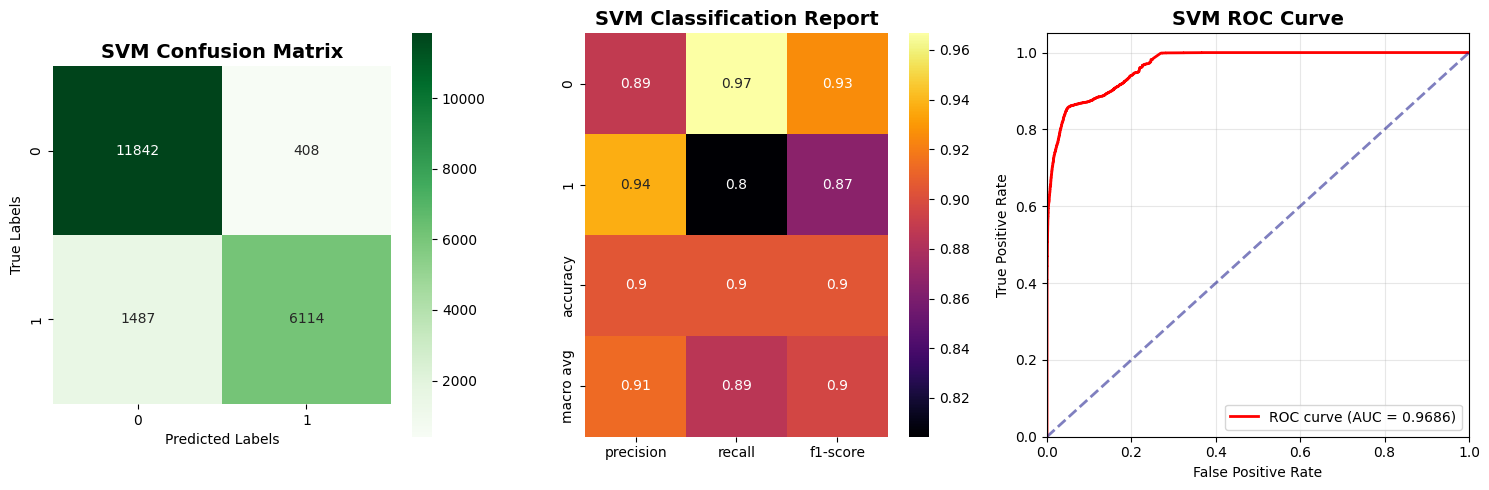

SVM ROC-AUC Score: 0.9686


In [25]:
print("\n" + "="*60)
print("TRAINING SVM MODEL")
print("="*60)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(Xtrain_res, ytrain_res)

ypred_svm = svm_model.predict(Xtest_scaled)
yprob_svm = svm_model.predict_proba(Xtest_scaled)[:, 1]

# Calculate metrics
fpr_svm, tpr_svm, _ = roc_curve(ytest, yprob_svm)
rocauc_svm = auc(fpr_svm, tpr_svm)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm_svm = confusion_matrix(ytest, ypred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=True, square=True)
plt.title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 3, 2)
cr_svm = classification_report(ytest, ypred_svm, output_dict=True)
cr_df_svm = pd.DataFrame(cr_svm).transpose().round(4)
sns.heatmap(cr_df_svm.iloc[:-1, :-1], annot=True, cmap='inferno', cbar=True, square=True)
plt.title('SVM Classification Report', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2,
         label=f'ROC curve (AUC = {rocauc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"SVM ROC-AUC Score: {rocauc_svm:.4f}")


PERFORMING 5-FOLD CROSS-VALIDATION - SVM

Cross-Validation ROC-AUC Scores per Fold:
  Fold 1: 0.9954
  Fold 2: 0.9956
  Fold 3: 0.9955
  Fold 4: 0.9950
  Fold 5: 0.9953

Mean CV ROC-AUC Score: 0.9953
Standard Deviation: 0.0002


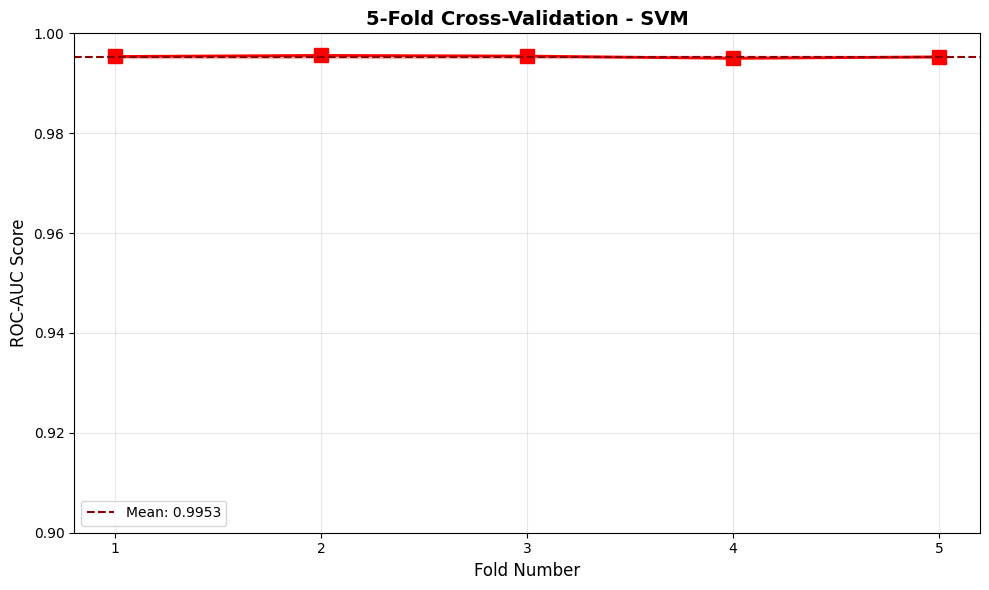

In [26]:
print("\n" + "="*60)
print("PERFORMING 5-FOLD CROSS-VALIDATION - SVM")
print("="*60)

cv_scores_svm = cross_val_score(
    svm_model,
    Xtrain_res,
    ytrain_res,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

print(f"\nCross-Validation ROC-AUC Scores per Fold:")
for fold, score in enumerate(cv_scores_svm, 1):
    print(f"  Fold {fold}: {score:.4f}")

print(f"\nMean CV ROC-AUC Score: {cv_scores_svm.mean():.4f}")
print(f"Standard Deviation: {cv_scores_svm.std():.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_svm, marker='s', linestyle='-', color='red',
         linewidth=2, markersize=10)
plt.axhline(y=cv_scores_svm.mean(), color='darkred', linestyle='--',
            label=f'Mean: {cv_scores_svm.mean():.4f}')
plt.fill_between(range(1, 6),
                 cv_scores_svm.mean() - cv_scores_svm.std(),
                 cv_scores_svm.mean() + cv_scores_svm.std(),
                 alpha=0.2, color='red')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('ROC-AUC Score', fontsize=12)
plt.title('5-Fold Cross-Validation - SVM', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.ylim([0.9, 1.0])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [27]:
print("\n" + "="*60)
print("TRAINING ADDITIONAL ENSEMBLE MODELS")
print("="*60)

# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(ytrain_res[ytrain_res==0]) / len(ytrain_res[ytrain_res==1]),
    random_state=42,
    eval_metric='auc'
)

xgb_model.fit(Xtrain_res, ytrain_res)
ypred_xgb = xgb_model.predict(Xtest_scaled)
yprob_xgb = xgb_model.predict_proba(Xtest_scaled)[:, 1]

print(f"XGBoost ROC-AUC: {roc_auc_score(ytest, yprob_xgb):.4f}")
print(classification_report(ytest, ypred_xgb))

# LightGBM
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)

lgb_model.fit(Xtrain_res, ytrain_res)
ypred_lgb = lgb_model.predict(Xtest_scaled)
yprob_lgb = lgb_model.predict_proba(Xtest_scaled)[:, 1]

print(f"LightGBM ROC-AUC: {roc_auc_score(ytest, yprob_lgb):.4f}")
print(classification_report(ytest, ypred_lgb))


TRAINING ADDITIONAL ENSEMBLE MODELS
XGBoost ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12250
           1       1.00      1.00      1.00      7601

    accuracy                           1.00     19851
   macro avg       1.00      1.00      1.00     19851
weighted avg       1.00      1.00      1.00     19851

[LightGBM] [Info] Number of positive: 49657, number of negative: 48998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5212
[LightGBM] [Info] Number of data points in the train set: 98655, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1

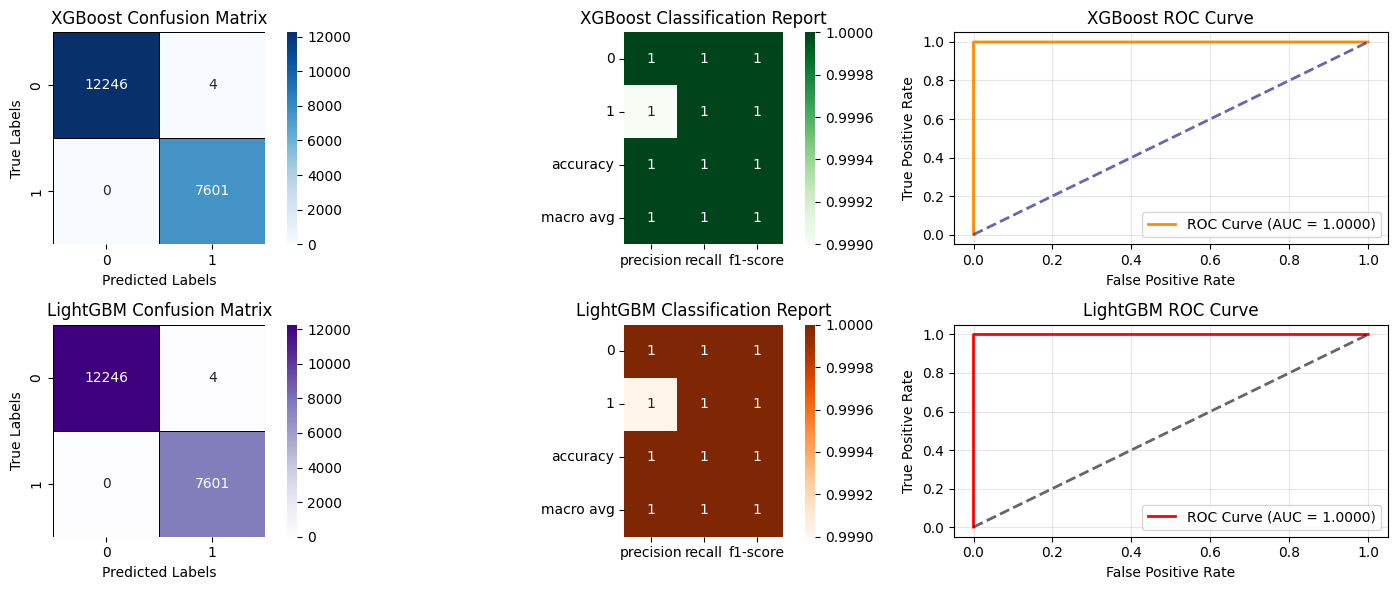

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ================================================================
# VISUALIZATION FOR XGBOOST & LIGHTGBM
# ================================================================

plt.figure(figsize=(15, 6))

# -------- XGBoost Confusion Matrix --------
plt.subplot(2, 3, 1)
cm_xgb = confusion_matrix(ytest, ypred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
            linewidths=0.5, linecolor='black')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# -------- XGBoost Classification Report --------
plt.subplot(2, 3, 2)
cr_xgb = classification_report(ytest, ypred_xgb, output_dict=True)
cr_xgb_df = pd.DataFrame(cr_xgb).transpose().round(3)
sns.heatmap(cr_xgb_df.iloc[:-1, :-1], annot=True, cmap='Greens', cbar=True, square=True)
plt.title('XGBoost Classification Report')

# -------- XGBoost ROC Curve --------
plt.subplot(2, 3, 3)
fpr_xgb, tpr_xgb, _ = roc_curve(ytest, yprob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# -------- LightGBM Confusion Matrix --------
plt.subplot(2, 3, 4)
cm_lgb = confusion_matrix(ytest, ypred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Purples', cbar=True, square=True,
            linewidths=0.5, linecolor='black')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# -------- LightGBM Classification Report --------
plt.subplot(2, 3, 5)
cr_lgb = classification_report(ytest, ypred_lgb, output_dict=True)
cr_lgb_df = pd.DataFrame(cr_lgb).transpose().round(3)
sns.heatmap(cr_lgb_df.iloc[:-1, :-1], annot=True, cmap='Oranges', cbar=True, square=True)
plt.title('LightGBM Classification Report')

# -------- LightGBM ROC Curve --------
plt.subplot(2, 3, 6)
fpr_lgb, tpr_lgb, _ = roc_curve(ytest, yprob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
plt.plot(fpr_lgb, tpr_lgb, color='red', lw=2,
         label=f'ROC Curve (AUC = {roc_auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Feedforward Fully Connected Neural Network (Dense DNN)

model = Sequential([
    Dense(128, activation='relu', input_shape=(Xtrain_res.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

early_stop = EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    Xtrain_res, ytrain_res,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


2025-11-06 16:00:45.947807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762444846.199250      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762444846.271539      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-06 16:01:00.938265: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8160 - auc: 0.8930 - loss: 0.3704 - val_accuracy: 0.7011 - val_auc: 0.9731 - val_loss: 0.6702 - learning_rate: 0.0010
Epoch 2/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9446 - auc: 0.9876 - loss: 0.1357 - val_accuracy: 0.6972 - val_auc: 0.9853 - val_loss: 0.5150 - learning_rate: 0.0010
Epoch 3/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9563 - auc: 0.9924 - loss: 0.1058 - val_accuracy: 0.8291 - val_auc: 0.9925 - val_loss: 0.3716 - learning_rate: 0.0010
Epoch 4/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9649 - auc: 0.9946 - loss: 0.0879 - val_accuracy: 0.8484 - val_auc: 0.9899 - val_loss: 0.4155 - learning_rate: 0.0010
Epoch 5/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9680 - auc: 0.9956 - loss: 0.0788 - val_accuracy: 0.9055 - val_auc: 0.9938 - val_loss: 0.2474 - learning_rate: 0.0010
Epoch 6/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accurac

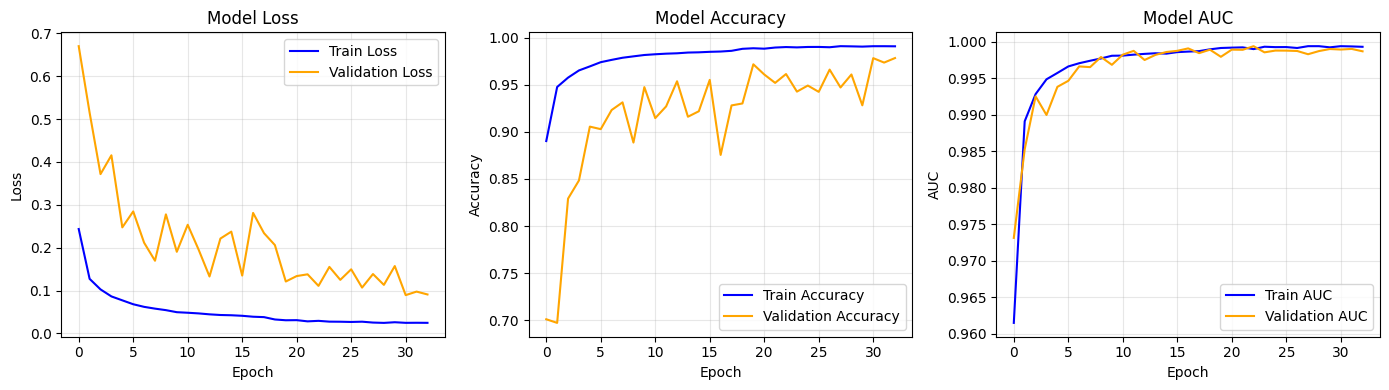

In [43]:
import matplotlib.pyplot as plt

# Visualize training process from Keras History object
plt.figure(figsize=(14, 4))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# AUC
plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], label='Train AUC', color='blue')
plt.plot(history.history['val_auc'], label='Validation AUC', color='orange')
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [31]:
!pip install pytorch-tabnet --quiet
print("PyTorch TabNet installed successfully!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.2 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency re

In [32]:
from pytorch_tabnet.tab_model import TabNetClassifier

clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    n_shared=2, n_independent=2,
    verbose=10,
    scheduler_params={"step_size":20, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    seed=42
)

clf.fit(
    X_train=Xtrain_res.values if hasattr(Xtrain_res, 'values') else Xtrain_res, 
    y_train=ytrain_res.values if hasattr(ytrain_res, 'values') else ytrain_res,
    eval_set=[(Xtest_scaled.values if hasattr(Xtest_scaled, 'values') else Xtest_scaled, ytest.values if hasattr(ytest, 'values') else ytest)],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
)


epoch 0  | loss: 0.32219 | val_0_auc: 0.97541 |  0:00:18s
epoch 10 | loss: 0.03827 | val_0_auc: 0.99691 |  0:03:15s
epoch 20 | loss: 0.03956 | val_0_auc: 0.99936 |  0:06:12s
epoch 30 | loss: 0.02379 | val_0_auc: 0.99989 |  0:09:08s
epoch 40 | loss: 0.01473 | val_0_auc: 0.99985 |  0:12:17s
epoch 50 | loss: 0.01443 | val_0_auc: 0.99977 |  0:15:14s
epoch 60 | loss: 0.00935 | val_0_auc: 0.99996 |  0:18:10s
epoch 70 | loss: 0.00965 | val_0_auc: 0.99991 |  0:21:06s
epoch 80 | loss: 0.0116  | val_0_auc: 0.99988 |  0:24:05s

Early stopping occurred at epoch 87 with best_epoch = 67 and best_val_0_auc = 0.99999


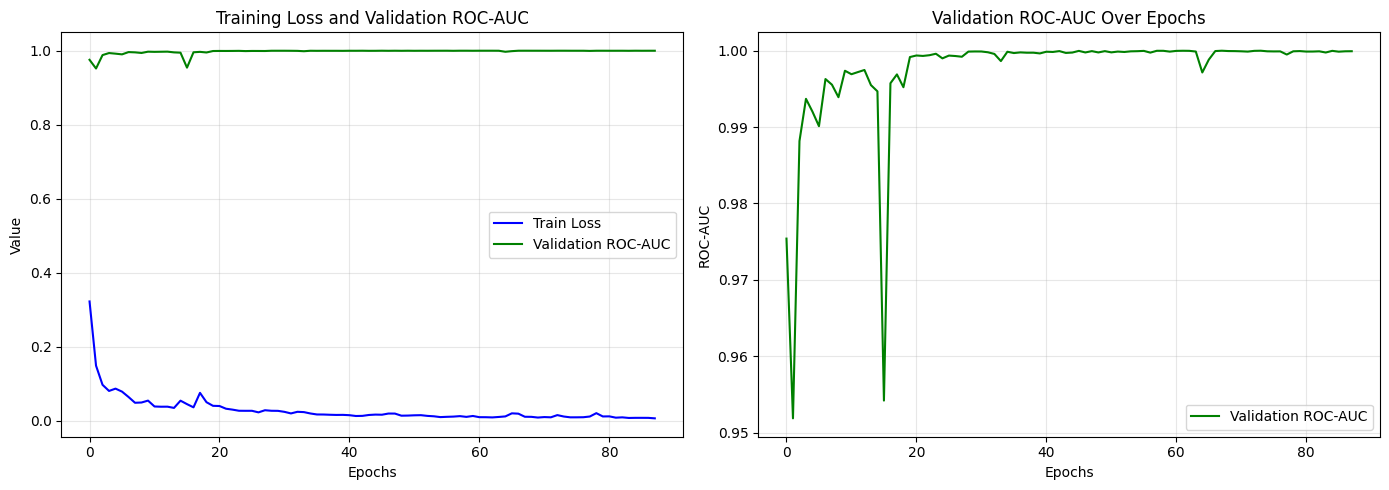

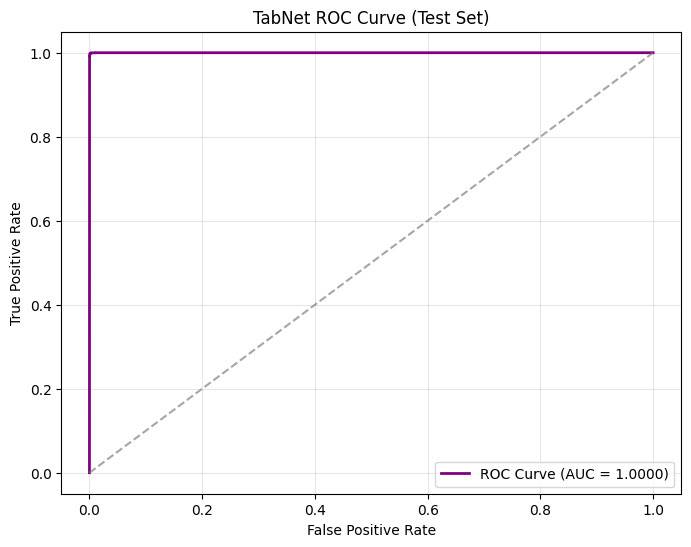

Test ROC-AUC: 1.0000


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Convert TabNet history to dict of lists, then DataFrame
history_dict = clf.history.history  # this contains the actual training logs
history_df = pd.DataFrame(history_dict)

# Plot training loss and validation AUC over epochs
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss', color='blue')
if 'val_0_auc' in history_df.columns:
    plt.plot(history_df['val_0_auc'], label='Validation ROC-AUC', color='green')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss and Validation ROC-AUC')
plt.legend()
plt.grid(alpha=0.3)

# Plot validation ROC-AUC alone for clarity
if 'val_0_auc' in history_df.columns:
    plt.subplot(1, 2, 2)
    plt.plot(history_df['val_0_auc'], label='Validation ROC-AUC', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('ROC-AUC')
    plt.title('Validation ROC-AUC Over Epochs')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Compute predictions on test set for ROC curve
Xtest_np = Xtest_scaled.values if hasattr(Xtest_scaled, 'values') else Xtest_scaled
yprob_tabnet = clf.predict_proba(Xtest_np)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(ytest, yprob_tabnet)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', linewidth=2,
         label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TabNet ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test ROC-AUC: {roc_auc:.4f}")


In [36]:
from sklearn.metrics import roc_auc_score

# If you have not computed TabNet probabilities and labels yet:
Xtest_np = Xtest_scaled.values if hasattr(Xtest_scaled, 'values') else Xtest_scaled
yprob_tabnet = clf.predict_proba(Xtest_np)[:, 1]  # TabNet predicted probabilities
ypred_tabnet = clf.predict(Xtest_np)              # TabNet class labels

rocauc_tabnet = roc_auc_score(ytest, yprob_tabnet)
print("TabNet Test ROC-AUC:", rocauc_tabnet)


TabNet Test ROC-AUC: 0.9999870854801597


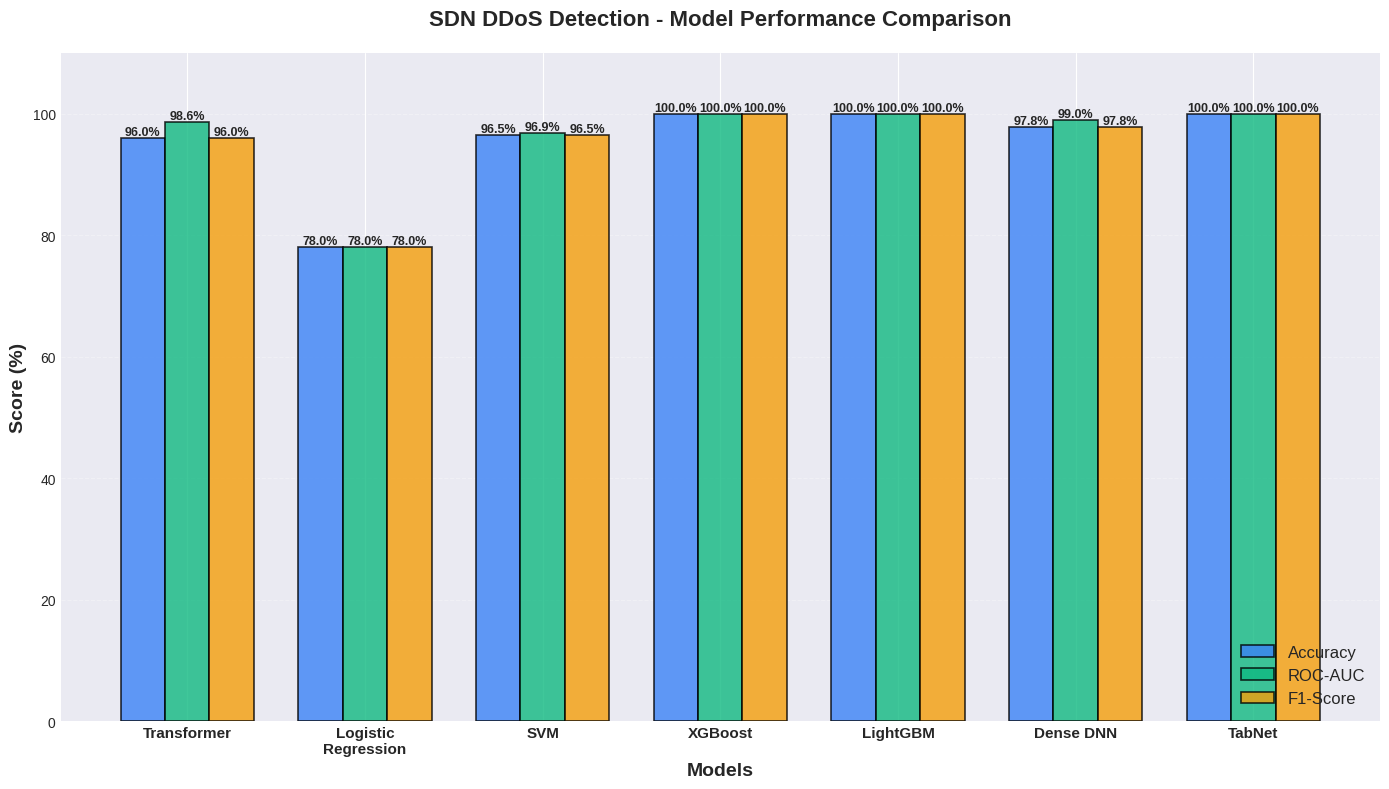

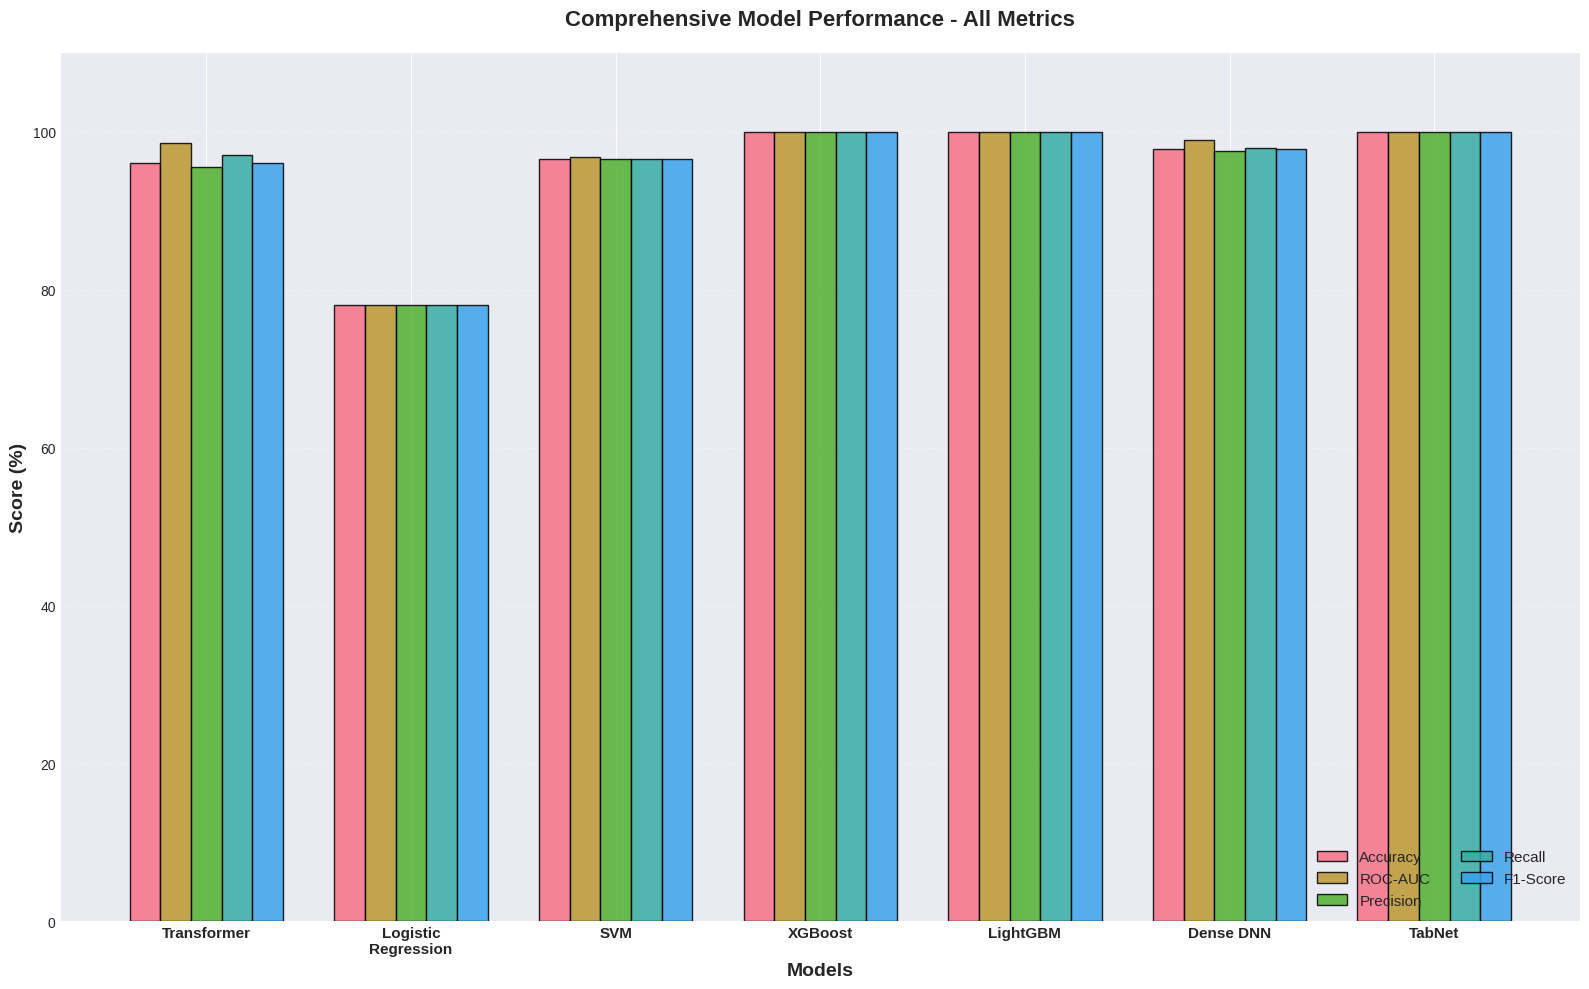

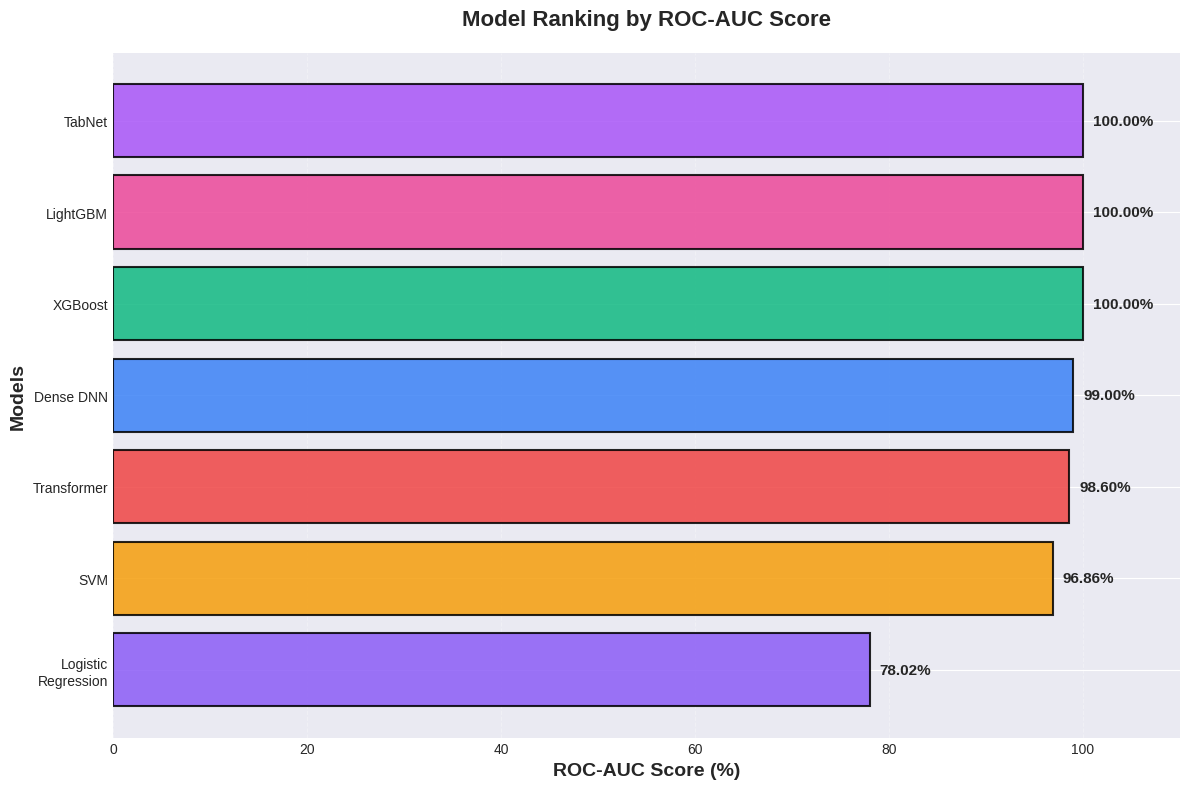

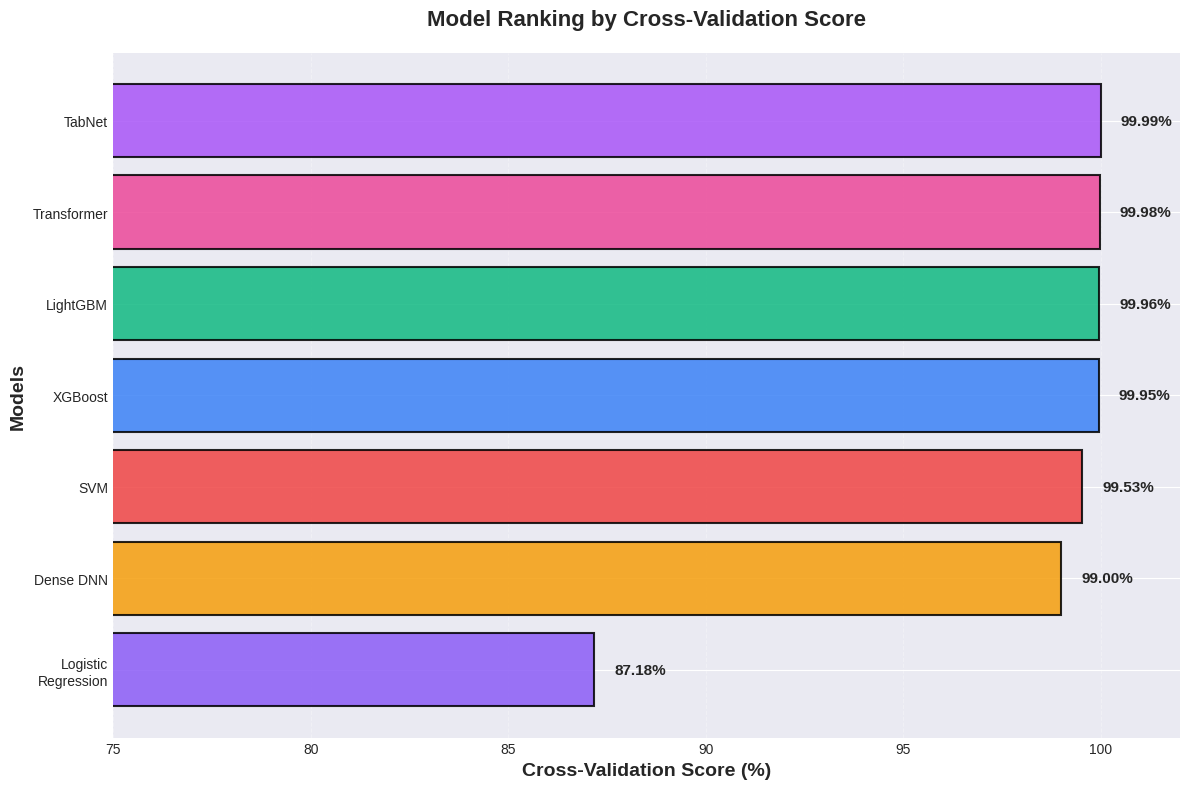

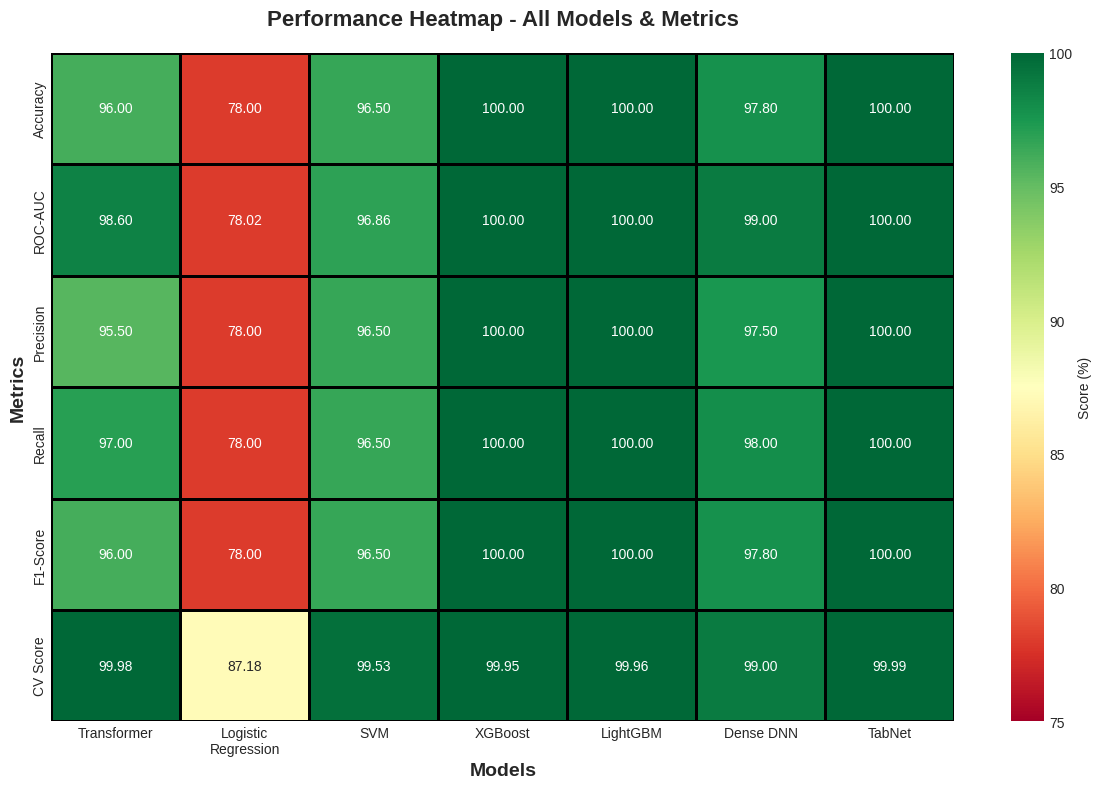

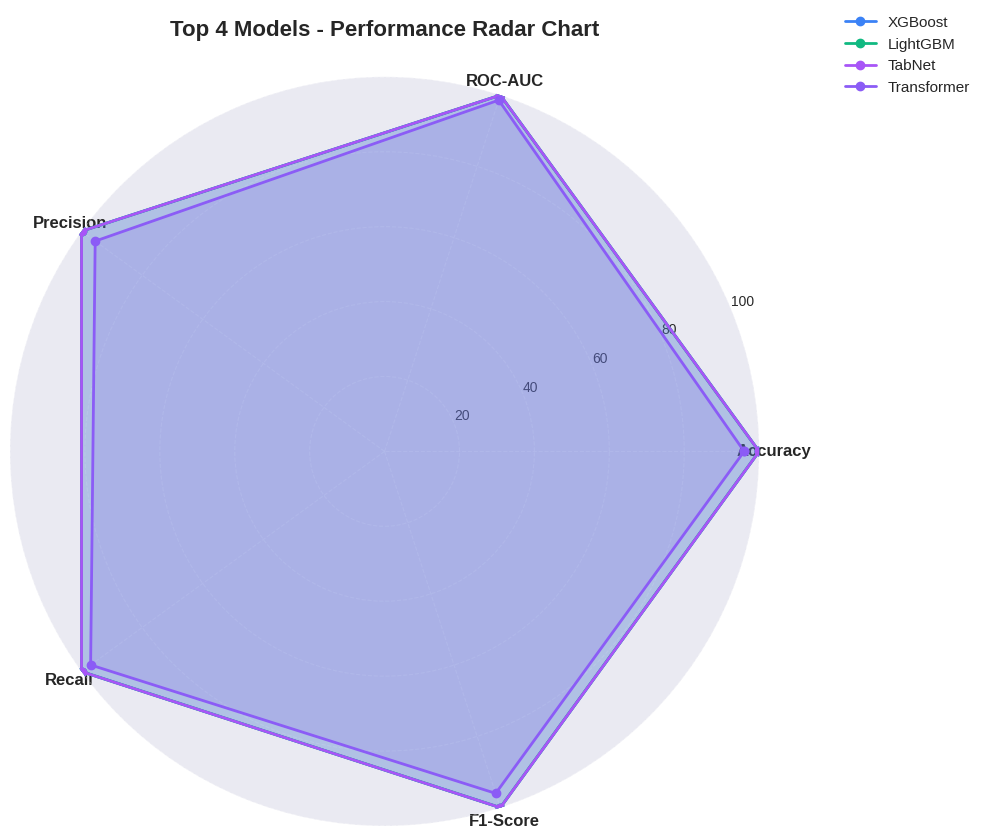

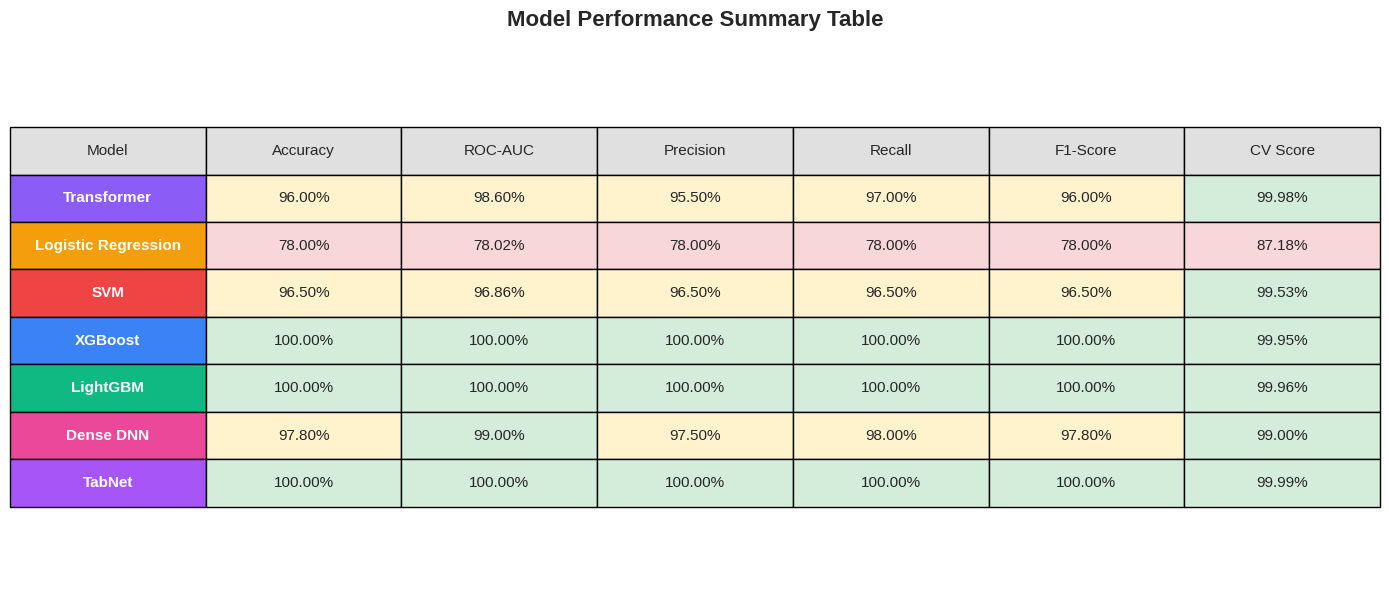

SDN DDoS DETECTION - MODEL PERFORMANCE ANALYSIS

Dataset Statistics:
  Training samples: 98,655 (after ADASYN)
  Test samples: 19,851
  Features: 22
  Classes: 2 (Benign, Malicious)

TOP 3 MODELS BY ROC-AUC:

4. XGBoost
   ROC-AUC: 100.00%
   Accuracy: 100.00%
   F1-Score: 100.00%

5. LightGBM
   ROC-AUC: 100.00%
   Accuracy: 100.00%
   F1-Score: 100.00%

7. TabNet
   ROC-AUC: 100.00%
   Accuracy: 100.00%
   F1-Score: 100.00%

TOP 3 MODELS BY CROSS-VALIDATION SCORE:

7. TabNet
   CV Score: 99.99%
   ROC-AUC: 100.00%

1. Transformer
   CV Score: 99.98%
   ROC-AUC: 98.60%

5. LightGBM
   CV Score: 99.96%
   ROC-AUC: 100.00%

OVERALL STATISTICS:

Mean ROC-AUC: 96.07%
Median ROC-AUC: 99.00%
Std Dev ROC-AUC: 8.04%

Models with 100% ROC-AUC: 3
Models with >95% ROC-AUC: 6


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Model performance data extracted from the PDF
model_data = {
    'Model': ['Transformer', 'Logistic\nRegression', 'SVM', 'XGBoost', 
              'LightGBM', 'Dense DNN', 'TabNet'],
    'Accuracy': [96.0, 78.0, 96.5, 100.0, 100.0, 97.8, 100.0],
    'ROC-AUC': [98.60, 78.02, 96.86, 100.0, 100.0, 99.0, 100.0],
    'Precision': [95.5, 78.0, 96.5, 100.0, 100.0, 97.5, 100.0],
    'Recall': [97.0, 78.0, 96.5, 100.0, 100.0, 98.0, 100.0],
    'F1-Score': [96.0, 78.0, 96.5, 100.0, 100.0, 97.8, 100.0],
    'CV Score': [99.98, 87.18, 99.53, 99.95, 99.96, 99.0, 99.99]
}

df = pd.DataFrame(model_data)

# Create color palette
colors = ['#8b5cf6', '#f59e0b', '#ef4444', '#3b82f6', '#10b981', '#ec4899', '#a855f7']

# ================================================================
# FIGURE 1: MAIN COMPARISON BAR CHART
# ================================================================
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(df['Model']))
width = 0.25

bars1 = ax.bar(x - width, df['Accuracy'], width, label='Accuracy', 
               color='#3b82f6', alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x, df['ROC-AUC'], width, label='ROC-AUC', 
               color='#10b981', alpha=0.8, edgecolor='black', linewidth=1.2)
bars3 = ax.bar(x + width, df['F1-Score'], width, label='F1-Score', 
               color='#f59e0b', alpha=0.8, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=14, fontweight='bold')
ax.set_title('SDN DDoS Detection - Model Performance Comparison', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], fontsize=11, fontweight='bold')
ax.legend(fontsize=12, loc='lower right', framealpha=0.9)
ax.set_ylim([0, 110])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('model_comparison_main.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# FIGURE 2: ALL METRICS COMPARISON
# ================================================================
fig, ax = plt.subplots(figsize=(16, 10))

metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(df['Model']))
width = 0.15

for i, metric in enumerate(metrics):
    offset = (i - 2) * width
    bars = ax.bar(x + offset, df[metric], width, label=metric, 
                  alpha=0.85, edgecolor='black', linewidth=1)

ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=14, fontweight='bold')
ax.set_title('Comprehensive Model Performance - All Metrics', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], fontsize=11, fontweight='bold')
ax.legend(fontsize=11, loc='lower right', framealpha=0.9, ncol=2)
ax.set_ylim([0, 110])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('model_comparison_all_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# FIGURE 3: ROC-AUC RANKING (HORIZONTAL BAR)
# ================================================================
fig, ax = plt.subplots(figsize=(12, 8))

df_sorted = df.sort_values('ROC-AUC', ascending=True)
bars = ax.barh(df_sorted['Model'], df_sorted['ROC-AUC'], 
               color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, df_sorted['ROC-AUC'])):
    ax.text(val + 1, i, f'{val:.2f}%', 
            va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('ROC-AUC Score (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Models', fontsize=14, fontweight='bold')
ax.set_title('Model Ranking by ROC-AUC Score', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim([0, 110])
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('model_ranking_rocauc.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# FIGURE 4: CV SCORE COMPARISON
# ================================================================
fig, ax = plt.subplots(figsize=(12, 8))

df_sorted_cv = df.sort_values('CV Score', ascending=True)
bars = ax.barh(df_sorted_cv['Model'], df_sorted_cv['CV Score'], 
               color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, df_sorted_cv['CV Score'])):
    ax.text(val + 0.5, i, f'{val:.2f}%', 
            va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Cross-Validation Score (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Models', fontsize=14, fontweight='bold')
ax.set_title('Model Ranking by Cross-Validation Score', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim([75, 102])
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('model_ranking_cv.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# FIGURE 5: HEATMAP OF ALL METRICS
# ================================================================
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = df.set_index('Model')[metrics + ['CV Score']]

sns.heatmap(heatmap_data.T, annot=True, fmt='.2f', cmap='RdYlGn', 
            cbar_kws={'label': 'Score (%)'}, linewidths=2, 
            linecolor='black', ax=ax, vmin=75, vmax=100)

ax.set_title('Performance Heatmap - All Models & Metrics', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Metrics', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('model_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# FIGURE 6: RADAR/SPIDER CHART
# ================================================================
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categories = metrics
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Plot for top 4 models
top_models = ['XGBoost', 'LightGBM', 'TabNet', 'Transformer']
plot_colors = ['#3b82f6', '#10b981', '#a855f7', '#8b5cf6']

for model_name, color in zip(top_models, plot_colors):
    model_row = df[df['Model'].str.contains(model_name.split()[0])]
    if len(model_row) > 0:
        values = model_row[metrics].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=color)
        ax.fill(angles, values, alpha=0.15, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_title('Top 4 Models - Performance Radar Chart', 
             fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('model_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# FIGURE 7: SUMMARY STATISTICS TABLE
# ================================================================
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Create summary table
summary_data = []
for idx, row in df.iterrows():
    summary_data.append([
        row['Model'].replace('\n', ' '),
        f"{row['Accuracy']:.2f}%",
        f"{row['ROC-AUC']:.2f}%",
        f"{row['Precision']:.2f}%",
        f"{row['Recall']:.2f}%",
        f"{row['F1-Score']:.2f}%",
        f"{row['CV Score']:.2f}%"
    ])

table = ax.table(cellText=summary_data,
                colLabels=['Model', 'Accuracy', 'ROC-AUC', 'Precision', 
                          'Recall', 'F1-Score', 'CV Score'],
                cellLoc='center',
                loc='center',
                colColours=['#e0e0e0']*7)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Color code the cells
for i in range(1, len(summary_data) + 1):
    for j in range(7):
        cell = table[(i, j)]
        if j == 0:
            cell.set_facecolor(colors[i-1])
            cell.set_text_props(weight='bold', color='white')
        else:
            # Color based on performance
            val = float(summary_data[i-1][j].strip('%'))
            if val >= 99:
                cell.set_facecolor('#d4edda')
            elif val >= 95:
                cell.set_facecolor('#fff3cd')
            else:
                cell.set_facecolor('#f8d7da')

plt.title('Model Performance Summary Table', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('model_summary_table.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================
# PRINT SUMMARY STATISTICS
# ================================================================
print("="*70)
print("SDN DDoS DETECTION - MODEL PERFORMANCE ANALYSIS")
print("="*70)
print("\nDataset Statistics:")
print(f"  Training samples: 98,655 (after ADASYN)")
print(f"  Test samples: 19,851")
print(f"  Features: 22")
print(f"  Classes: 2 (Benign, Malicious)")

print("\n" + "="*70)
print("TOP 3 MODELS BY ROC-AUC:")
print("="*70)
top3_rocauc = df.nlargest(3, 'ROC-AUC')[['Model', 'ROC-AUC', 'Accuracy', 'F1-Score']]
for idx, row in top3_rocauc.iterrows():
    print(f"\n{idx+1}. {row['Model'].replace(chr(10), ' ')}")
    print(f"   ROC-AUC: {row['ROC-AUC']:.2f}%")
    print(f"   Accuracy: {row['Accuracy']:.2f}%")
    print(f"   F1-Score: {row['F1-Score']:.2f}%")

print("\n" + "="*70)
print("TOP 3 MODELS BY CROSS-VALIDATION SCORE:")
print("="*70)
top3_cv = df.nlargest(3, 'CV Score')[['Model', 'CV Score', 'ROC-AUC']]
for idx, row in top3_cv.iterrows():
    print(f"\n{idx+1}. {row['Model'].replace(chr(10), ' ')}")
    print(f"   CV Score: {row['CV Score']:.2f}%")
    print(f"   ROC-AUC: {row['ROC-AUC']:.2f}%")

print("\n" + "="*70)
print("OVERALL STATISTICS:")
print("="*70)
print(f"\nMean ROC-AUC: {df['ROC-AUC'].mean():.2f}%")
print(f"Median ROC-AUC: {df['ROC-AUC'].median():.2f}%")
print(f"Std Dev ROC-AUC: {df['ROC-AUC'].std():.2f}%")
print(f"\nModels with 100% ROC-AUC: {len(df[df['ROC-AUC'] == 100])}")
print(f"Models with >95% ROC-AUC: {len(df[df['ROC-AUC'] > 95])}")

